# Create paper emulation figure


In [1]:

import os
import numpy as np
from scipy.stats import stats
os.chdir('/home/ybhatti/prjs1076/Emulator')

## Ignore my broken HDF5 install|...
os.putenv("HDF5_DISABLE_VERSION_CHECK", '1')

def get_memory_usage():
    process = psutil.Process()
    mem_info = process.memory_info()
    return mem_info.rss/1000000000  # Return resident set size in bytes
def find_diffs(run10,run1,axis1):
    t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]
    diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
    return diff
from scipy.stats import gaussian_kde


In [2]:
#import iris
from utils import get_bc_ppe_data, normalize
import psutil
from esem import gp_model
from esem.utils import get_random_params
import seaborn
import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import xarray as xr
os.chdir('/home/ybhatti/yusufb/Scripts/')
from my_functions import *
os.chdir('/home/ybhatti/prjs1076/ESEm')
from esem import cnn_model
os.chdir('/home/ybhatti/prjs1076/Emulator')
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.colors as mcolors
import gc
from typing import Optional
from matplotlib.contour import QuadContourSet  # Importing QuadContourSet
from PDFs import *

print(f"Memory usage: {get_memory_usage()} GB")

dms_ppt=(29/62.13)*1e12#/1000 # molecular mass of air (g/mol). molecular mass of DMS (g/mol).
dms_ppb=(29/62.13)*1e11#/1000 # molecular mass of air (g/mol). molecular mass of DMS (g/mol).

h2so4_mmr=1e14#/1000
h2so4_aod=1e15#/1000
so2_ppb=(29/64.066)*1e11#/1000 # ppb
so2_ppt=(29/64.066)*1e12#/1000 # ppb
oh_ppt=(29/17.008)*1e12#/1000 # ppb
no3_ppt=(29/62.0049)*1e12#/1000 # ppb
o3_ppt=(29/48)*1e12#/1000 # ppb
cl_ppt=(29/35.453)*1e12#/1000 # ppb
h2so4_ppt=(29/98.079)*1e12#/1000 # ppb
h2so4_ppm=(29/98.079)*1e10#/1000 # ppb

lats=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/AOD_PPE.nc').lat
lons=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/AOD_PPE.nc').lon


2025-08-26 17:18:19.355248: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 17:18:19.359607: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 17:18:19.373632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-26 17:18:19.394342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-26 17:18:19.400263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 17:18:19.415124: I tensorflow/core/platform/cpu_feature_gu

Memory usage: 0.512589824 GB


## Read in the parameters and data

In [3]:
ANG_HF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/ANG_550_865_Hifreq_PPE.nc').ANG_550nm_865nm#
AOD_HF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/AOD_Hifreq_PPE.nc').TAU_2D_550nm#
ABS_HF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/ABS_Hifreq_PPE.nc').ABS_2D_550nm#
SSA_HF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/SSA_Hifreq_PPE.nc').__xarray_dataarray_variable__#

SSA_PPE = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Processed/POLDER/2009/SSA_PPE_Pre_Emulator.nc').mean('time').load().__xarray_dataarray_variable__
ANG_PPE = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Processed/POLDER/2009/ANG_PPE_Pre_Emulator.nc').mean('time').load().ANG_550nm_865nm
AOD_PPE = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Processed/POLDER/2009/AOD_PPE_Pre_Emulator.nc').mean('time').load().TAU_2D_550nm
AOD_PPE = AOD_PPE.fillna(0)
SSA_PPE = SSA_PPE.fillna(0)
ANG_PPE = ANG_PPE.fillna(0)

# SSA_OCEAN = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Processed/POLDER/SSA_OCEAN_Polder.nc').load().__xarray_dataarray_variable__
# ANG_OCEAN = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Processed/POLDER/ANG_OCEAN_Polder.nc').load().ANG_550nm_865nm
# AOD_OCEAN = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Processed/POLDER/AOD_OCEAN_Polder.nc').load().TAU_2D_550nm


AOD_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/AOD_PPE.nc').TAU_2D_550nm.groupby('time.month').mean()#[0]
AOD_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/AOD_PPE.nc').TAU_2D_550nm.groupby('time.month').mean()#[0]
AOD = AOD_PD - AOD_PI

DMS_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/DMS_PPE.nc').DMS.groupby('time.month').mean()#[0]

top_net_SW_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/SW_All_Sky_Flux_PPE.nc').srad0.groupby('time.month').mean()#[0]# - 0.28734403
top_net_SW_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/SW_All_Sky_Flux_PPE.nc').srad0.groupby('time.month').mean()#[0] 
top_net_SW_Clear_Sky_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/SW_Clear_Sky_Flux_PPE.nc').sraf0.groupby('time.month').mean()#[0]
top_net_SW_Clear_Sky_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/SW_Clear_Sky_Flux_PPE.nc').sraf0.groupby('time.month').mean()#[0] 

top_net_LW_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/LW_All_Sky_Flux_PPE.nc').trad0.groupby('time.month').mean()#[0]
top_net_LW_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/LW_All_Sky_Flux_PPE.nc').trad0.groupby('time.month').mean()#[0]
top_net_LW_Clear_Sky_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/LW_Clear_Sky_Flux_PPE.nc').traf0.groupby('time.month').mean()#[0]
top_net_LW_Clear_Sky_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/LW_Clear_Sky_Flux_PPE.nc').traf0.groupby('time.month').mean()#[0]
CF_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/Cloud_Cover_PPE.nc').aclcov.groupby('time.month').mean()#[0]
CF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/Cloud_Cover_PPE.nc').aclcov.groupby('time.month').mean()#[0]
# CF_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/Cloud_Cover_PPE.nc').aclcov.mean('time')#[0]
# CF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/Cloud_Cover_PPE.nc').aclcov.mean('time')#[0]

CF = CF_PD - CF_PI

PI_RF = (top_net_SW_PI + top_net_LW_PI)
PD_RF = (top_net_SW_PD + top_net_LW_PD)
ERF_SW_CS = top_net_SW_Clear_Sky_PD - top_net_SW_Clear_Sky_PI


ACI_PD = top_net_SW_PD - top_net_SW_Clear_Sky_PD
ACI_PI = top_net_SW_PI - top_net_SW_Clear_Sky_PI

ERF_ACI = ACI_PD - ACI_PI


LW_PD = top_net_LW_PD + top_net_LW_Clear_Sky_PD
LW_PI = top_net_LW_PI + top_net_LW_Clear_Sky_PI
ERF_LW_CS = top_net_LW_Clear_Sky_PD - top_net_LW_Clear_Sky_PI 

CRE_LW = LW_PD + ERF_ACI #ERF_ACI + ERF_LW

RF_CS_PD = top_net_LW_Clear_Sky_PD + top_net_SW_Clear_Sky_PD
RF_CS_PI = top_net_LW_Clear_Sky_PI + top_net_SW_Clear_Sky_PI

ERF_ARI= RF_CS_PD - RF_CS_PI
ARI  = top_net_SW_PD - top_net_SW_PI

cf = (1 - CF_PD)
ERF_ARI_CF = ERF_ARI * cf # (1 - CF_PD)


ERF_SW = top_net_SW_PD - top_net_SW_PI
ERF_LW = top_net_LW_PD - top_net_LW_PI 

ERF = (ERF_SW + ERF_LW)

####
PI_RF_old = top_net_SW_PI + top_net_LW_PI

#ABS = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/ABS_PPE.nc').ABS_2D_550nm.groupby('time.month').mean()
#SSA = 1 - (ABS / AOD_PD)
SSA_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/SSAlbedo_PPE.nc').__xarray_dataarray_variable__#.mean('month')
#SSA_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/SSAlbedo_PPE.nc').__xarray_dataarray_variable__#.mean('month')



# CF_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/Cloud_Cover_PPE.nc').aclcov.groupby('time.month').mean()
# CF_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/Cloud_Cover_PPE.nc').aclcov.groupby('time.month').mean()

# ANG_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PI/Processed/ANG_550_865_PPE.nc').ANG_550nm_865nm.groupby('time.month').mean()
ANG_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/ANG_550_865_PPE.nc').ANG_550nm_865nm.groupby('time.month').mean()

# Cloudy_Sky_PD = (RF_PD.mean('month') - (RF_CS_PD.mean('month') * (1 - CF_PD.mean('month')))) / CF_PD.mean('month')
# Cloudy_Sky_PI = (RF_PI.mean('month') - (RF_CS_PI.mean('month') * (1 - CF_PI.mean('month')))) / CF_PI.mean('month')

# Cloudy_Sky_PD = (RF_PD - (RF_CS_PD * (1 - CF_PD))) / CF_PD
# Cloudy_Sky_PI = (RF_PI - (RF_CS_PI * (1 - CF_PI))) / CF_PI

# AI_PD = ANG_PD * AOD_PD
# AI_PI = ANG_PI * AOD_PI
# ln_AI_PD = np.log(AI_PD) - np.log(AI_PI)




# aod_modes_PI=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/AOD_modes_PPE.nc')

# variables=['TAU_MODE_KS_550nm',
# 'TAU_MODE_KI_550nm',
# 'TAU_MODE_AS_550nm',
# 'TAU_MODE_AI_550nm',
# 'TAU_MODE_CS_550nm',
# 'TAU_MODE_CI_550nm']
# data=[]
# for v in (variables):
#     mean=areaweight(aod_modes_PI[v],lats).mean('time')
#     data.append(mean)

# combined = xr.concat(data, dim="modes").sortby('ensemble')
# mean_aod_modes = combined[:,1:].mean(dim='ensemble')
# std_aod_modes = combined[:,1:].std(dim='ensemble')


In [53]:
ppe_params = pd.read_csv('~/yusufb/Branches/PPE_Scripts/parameter_values_data/PPE_values.csv')[:]
AOD_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/AOD_PPE.nc').TAU_2D_550nm.groupby('time.month').mean()#[0]

valid_ensembles = AOD_PD['ensemble'].values  # Get ensemble values from AOD_PI
valid_ensembles = valid_ensembles[valid_ensembles != 0]  # Exclude control ensemble (0)

ppe_params.set_index(ppe_params.columns[0], inplace=True)
valid_params = ppe_params[ppe_params.index.isin([f'PPE_ENS_{ens}' for ens in valid_ensembles])]

# Create the new row with all columns set to 1, and update specific values
new_row = {col: 1 for col in valid_params.columns}
new_row.update({
    'V_SCALE_BC_RAD_NI': 0.71,
    'V_SCALE_DU_RAD_NI': 0.001,
    'V_SCALE_PH_PERT': 2.5e-06,
    'V_SCALE_CDNC_MIN': 40,
    'V_SCALE_KAPPA_SO4': 0.6,
})

# Create a DataFrame for the new row
new_row_df = pd.DataFrame([new_row], index=['PPE_Control'])

# Concatenate the new row DataFrame with the original DataFrame
ppe_param = pd.concat([new_row_df, valid_params])
#ppe_params = ppe_params.drop(ppe_params.index[[5,  17,  19,  69,  84, 113, 134,60, 161, 185]])
#ppe_params = ppe_params.drop(ppe_params.index[ [76]])

ppe_param['V_SCALE_PH_PERT']=np.log10(ppe_param['V_SCALE_PH_PERT'])*-1

ppe_paramater = np.log(ppe_param)#.iloc[1:])
ppe_para = ppe_paramater.apply(normalize, axis=0)



# updated_ppe_params.to_csv('~/yusufb/Branches/PPE_Scripts/parameter_values_data/Extended_PPE_Values.csv', index=False)



In [6]:
# ppe_params_before = pd.read_csv('~/yusufb/Branches/PPE_Scripts/parameter_values_data/PPE_values.csv')[:]
# AOD_PD=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/PD/Processed/AOD_PPE.nc').TAU_2D_550nm.groupby('time.month').mean()#[0]
ppe_param = pd.read_csv('~/yusufb/Branches/PPE_Scripts/parameter_values_data/Extended_PPE_Values.csv')[:]
# List of new index labels

# ppe_param = copy.deepcopy(ppe_params)
# new_index_labels = ['PPE_Control'] + [f'PPE_ENS_{i+1}' for i in range(0, len(ppe_param)-1)]
# # Assign the new index labels to the DataFrame
# ppe_param.index = new_index_labels
# #ppe_param['V_SCALE_PH_PERT'].values[:211] = 10 ** (ppe_param['V_SCALE_PH_PERT'].values[:211] * -1)

# # Now ppe_param has the new index labels

# valid_ensembles = AOD_PD['ensemble'].values  # Get ensemble values from AOD_PI
# valid_ensembles = valid_ensembles[valid_ensembles != 0]  # Exclude control ensemble (0)

# ppe_params.set_index(ppe_params.columns[0], inplace=True)
# valid_params = ppe_params[ppe_params.index.isin([f'PPE_ENS_{ens}' for ens in valid_ensembles])]

# # Create the new row with all columns set to 1, and update specific values
# new_row = {col: 1 for col in valid_params.columns}
# new_row.update({
#     'V_SCALE_BC_RAD_NI': 0.71,
#     'V_SCALE_DU_RAD_NI': 0.001,
#     'V_SCALE_PH_PERT': 2.5e-06,
#     'V_SCALE_CDNC_MIN': 40,
#     'V_SCALE_KAPPA_SO4': 0.6,
#     'V_SCALE_EMI_CMR_BB': 75,
#     'V_SCALE_EMI_CMR_BF': 30,
#     'V_SCALE_EMI_CMR_FF': 30

# })

# Create a DataFrame for the new row
# new_row_df = pd.DataFrame([new_row], index=['PPE_Control'])

# # Concatenate the new row DataFrame with the original DataFrame
# ppe_param = pd.concat([new_row_df, valid_params])
#ppe_params = ppe_params.drop(ppe_params.index[[5,  17,  19,  69,  84, 113, 134,60, 161, 185]])
#ppe_params = ppe_params.drop(ppe_params.index[ [76]])

#ppe_param['V_SCALE_PH_PERT']=np.log10(ppe_param['V_SCALE_PH_PERT'])*-1
ppe_param['V_SCALE_PH_PERT'].values[211:] = np.log10(ppe_param['V_SCALE_PH_PERT'].values[211:]) * -1
#ppe_param['V_SCALE_PH_PERT'].values[:211] = 10 ** (ppe_param['V_SCALE_PH_PERT'].values[:211] * -1)


# # List of parameters to exclude from the log transformation
exclude_params = [
    'V_SCALE_BC_RAD_NI', 'V_SCALE_DU_RAD_NI', 'V_SCALE_PH_PERT','V_SCALE_CDNC_MIN','V_SCALE_KAPPA_SS',
    'V_SCALE_KAPPA_SO4','V_SCALE_DRYDEP_AIT','V_SCALE_DRYDEP_ACC'
]
exclude_params = [
    'V_SCALE_PH_PERT'
]

# Apply log transformation to all parameters except those in the exclude list
ppe_paramater = ppe_param.copy()  # Create a copy to preserve the original data

ppe_param = ppe_param.drop(columns=["V_SCALE_VERTICAL_VELOCITY"])

# Apply the log transformation
for col in ppe_paramater.columns:
    if col in exclude_params:
        ppe_paramater[col] = np.log(ppe_paramater[col])

# Now ppe_param_log has the log-transformed values for all columns except those in the exclude list

#ppe_paramater = np.log(ppe_param)#.iloc[1:])
ppe_para = ppe_param.apply(normalize, axis=0)



# updated_ppe_params.to_csv('~/yusufb/Branches/PPE_Scripts/parameter_values_data/Extended_PPE_Values.csv', index=False)


In [3]:
ppe_param_extended = pd.read_csv('~/yusufb/Branches/PPE_Scripts/parameter_values_data/Extended_PPE_Values.csv')[:]
#ppe_param_extended = ppe_param_extended.drop(ppe_param_extended.index[[5,  17,  19,  69,  84, 113, 134,60, 161, 185]])
ppe_param_extended=ppe_param_extended.iloc[:]
#ppe_param_extended['V_SCALE_PH_PERT']=np.log10(ppe_param_extended['V_SCALE_PH_PERT'])*-1
ppe_param_extended['V_SCALE_PH_PERT'].values[211:] = np.log10(ppe_param_extended['V_SCALE_PH_PERT'].values[211:]) * -1
ppe_param_extended = ppe_param_extended.drop(columns=["V_SCALE_VERTICAL_VELOCITY"])

ppe_paramater = np.log(ppe_param_extended)#.iloc[1:])
ppe_paras = ppe_paramater.apply(normalize, axis=0)



In [8]:
ppe_aod_data = (AOD_PD - AOD_PI)  # Use .data to compute

ppe_aod = xr.DataArray(ppe_aod_data.mean('month'))  # Convert back to xarray after computation
ppe_aod = xr.DataArray(
    ppe_aod.data,  # Use .data to extract the values
    dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
    coords={"ensemble": ppe_aod_data.coords["ensemble"],
            "lat": ppe_aod_data.coords["lat"],
            "lon": ppe_aod_data.coords["lon"]},  # Set coordinates from RF_PI
    name=""  # Optionally, assign a name
)

ppe_aod_pd = xr.DataArray(AOD_PD.mean('month'))  # Convert back to xarray after computation
ppe_aod_pd = xr.DataArray(
    ppe_aod_pd.data,  # Use .data to extract the values
    dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
    coords={"ensemble": ppe_aod_data.coords["ensemble"],
            "lat": ppe_aod_data.coords["lat"],
            "lon": ppe_aod_data.coords["lon"]},  # Set coordinates from RF_PI
    name=""  # Optionally, assign a name
)

ppe_pd_rf = xr.DataArray(PD_RF).mean('month')  # Convert back to xarray after computation
ppe_pd_rf = xr.DataArray(
    ppe_pd_rf.data,  # Use .data to extract the values
    dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
    coords={"ensemble": AOD_PD.coords["ensemble"],
            "lat": AOD_PD.coords["lat"],
            "lon": AOD_PD.coords["lon"]},  # Set coordinates from RF_PI
    name=""  # Optionally, assign a name
)


ppe_rf = xr.DataArray(ERF).mean('month')  # Convert back to xarray after computation
ppe_erf = xr.DataArray(
    ppe_rf.data,  # Use .data to extract the values
    dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
    coords={"ensemble": AOD_PD.coords["ensemble"],
            "lat": AOD_PD.coords["lat"],
            "lon": AOD_PD.coords["lon"]},  # Set coordinates from RF_PI
    name=""  # Optionally, assign a name
)

# ppe_rfcs = xr.DataArray(ppe_rf_cs_data, name="Emulated_CSRF").mean('month')  # Convert back to xarray after computation
# ppe_rfcs = xr.DataArray(
#     ppe_rfcs.data,  # Use .data to extract the values
#     dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
#     coords={"ensemble": RF_CS_PD.coords["ensemble"],
#             "lat": RF_CS_PD.coords["lat"],
#             "lon": RF_CS_PD.coords["lon"]},  # Set coordinates from RF_PI
#     name="Emulated_RF"  # Optionally, assign a name
# )

ppe_erf_aci = xr.DataArray(ERF_ACI).mean('month')  # Convert back to xarray after computation
ppe_erf_aci = xr.DataArray(
    ppe_erf_aci.data,  # Use .data to extract the values
    dims=["ensemble", "lat", "lon"],  # Set the dimension names to ma12 currentlytch RF_PI
    coords={"ensemble": ERF_ACI.coords["ensemble"],
            "lat": ERF_ACI.coords["lat"],
            "lon": ERF_ACI.coords["lon"]},  # Set coordinates from RF_PI
    name=""  # Optionally, assign a name
)

ppe_erf_ari = xr.DataArray(ERF_ARI).mean('month')  # Convert back to xarray after computation
ppe_erf_ari = xr.DataArray(
    ppe_erf_ari.data,  # Use .data to extract the values
    dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
    coords={"ensemble": AOD_PI.coords["ensemble"],
            "lat": AOD_PI.coords["lat"],
            "lon": AOD_PI.coords["lon"]},  # Set coordinates from RF_PI
    name=""  # Optionally, assign a name
)


# ppe_ssa = xr.DataArray(
#     SSA_PD.data,  # Use .data to extract the values
#     dims=["ensemble", "lat", "lon"],  # Set the dimension names to match RF_PI
#     coords={"ensemble": AOD_PD.coords["ensemble"],
#             "lat": AOD_PD.coords["lat"],
#             "lon": AOD_PD.coords["lon"]},  # Set coordinates from RF_PI
#     name=""  # Optionally, assign a name
# )

import copy

combined_aod = xr.concat([AOD_PI,AOD_PD,ppe_aod_data], dim="AOD")
combined_aod=combined_aod.mean('month')

#ppe_var=copy.deepcopy(SSA_PPE[:-1].mean('month'))
ppe_var=copy.deepcopy(ANG_PPE[:-1])
ppe_var=copy.deepcopy(ppe_rf)

#ppe_var = ppe_var.isel(ensemble=~ppe_var.ensemble.isin([ 29,  57, 128]))
#ppe_var = ppe_var.isel(ensemble=~ppe_var.ensemble.isin([5,  17,  19,  69,  84, 113, 134,60, 161, 185]))

# n_test=60
# X_test, X_train = ppe_para[:n_test], ppe_para[n_test:]
# Y_test, Y_train = ppe_rf[:n_test], ppe_rf[n_test:]

n_total = len(ppe_para)
n_test = 66  # Number of test samples

# Generate randomized indices for splitting the data
random_indices = np.random.permutation(n_total)

# Split the randomized indices into test and train sets
test_indices = random_indices[:n_test]
train_indices = random_indices[n_test:]

X_test, X_train = ppe_para.iloc[test_indices], ppe_para.iloc[train_indices]
Y_test, Y_train = ppe_var.isel(ensemble=test_indices), ppe_var.isel(ensemble=train_indices)
# X_test, X_train = ppe_para[:n_test], ppe_para[n_test:]
# Y_test, Y_train = ppe_var[:n_test], ppe_var[n_test:]
print(f"Memory usage: {get_memory_usage()} GB")
gc.collect()

Memory usage: 8.003735552 GB


60

## Setup and run the models

In [14]:
# # nn_model_pi = cnn_model(X_train, Y_train[0])
# # nn_model_pd = cnn_model(X_train, Y_train[1])
# # nn_model_diff = cnn_model(X_train, Y_train[2])

# nn_model = cnn_model(X_train, Y_train)

# # Then use the magic command to profile a function
# print(f"Memory usage: {get_memory_usage()} GB")


In [ ]:
# nn_model.model.model.summary()
# print(f"Memory usage: {get_memory_usage()} GB")


In [43]:
# %%time
# # nn_model_pi.train()
# # nn_model_pd.train()
# # nn_model_diff.train()
# nn_model.train()

# print(f"Memory usage: {get_memory_usage()} GB")


In [11]:
# nn_prediction, _ = nn_model.predict(X_test.values)

In [12]:
# # Plot distributions
# plt.figure(figsize=(12, 6))
# plt.hist(Y_test.data.flatten(), bins=100, alpha=0.5, label='Actual Values')
# plt.hist(nn_prediction.data.flatten(), bins=100, alpha=0.5, label='Predicted Values')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# #plt.xlim([-1, 1])
# plt.title(f'Distribution of Actual vs. Predicted Values  = {np.corrcoef(Y_test.data.flatten(), nn_prediction.data.flatten())[1][0]**2:.4f}.')
# plt.legend()
# plt.grid(True)
# plt.show()


In [9]:
#kernal=['Matern52'] 
kernal=['Linear','Matern52'] # for SSA, ERF
#kernal=['Bias','Matern52','Polynomial'] 
#kernal=['Matern52'] 

#kernal=['Linear'] # For AOD and ANG, CF_PD_PI, AOD_PD_PI

#when the underlying function exhibits certain degrees of smoothness, Matern can be used. the higher the matern, the smoother the covariance and contineous 
gp_model_ = gp_model(X_train, Y_train, kernel=kernal)
gp_model_.train()
print(f"Memory usage: {get_memory_usage()} GB")
# gp_prediction, _ = gp_model_.predict(X_test.values)

# gp_prediction_all, _ = gp_model_.predict(ppe_para.values)
#ML=(gp_prediction)
#print(areaweight(ML[0],lats).mean().data)

2025-08-26 15:33:57.357173: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Memory usage: 9.783197696 GB


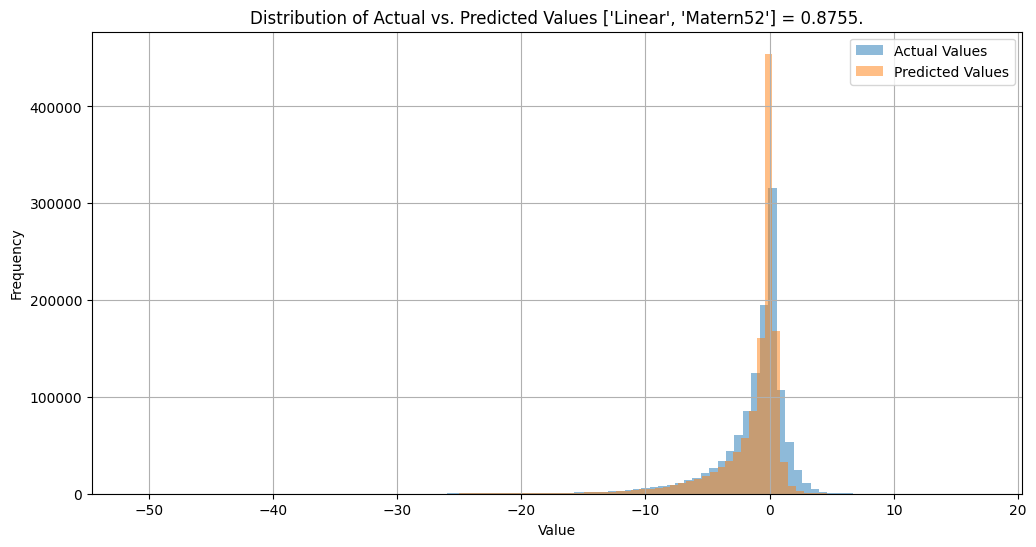

In [42]:
# Plot distributions
plt.figure(figsize=(12, 6))
plt.hist(Y_test.data.flatten(), bins=100, alpha=0.5, label='Actual Values')
plt.hist(gp_prediction.data.flatten(), bins=100, alpha=0.5, label='Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of Actual vs. Predicted Values {kernal} = {np.corrcoef(Y_test.data.flatten(), gp_prediction.data.flatten())[1][0]**2:.4f}.')
plt.legend()
plt.grid(True)
plt.show()


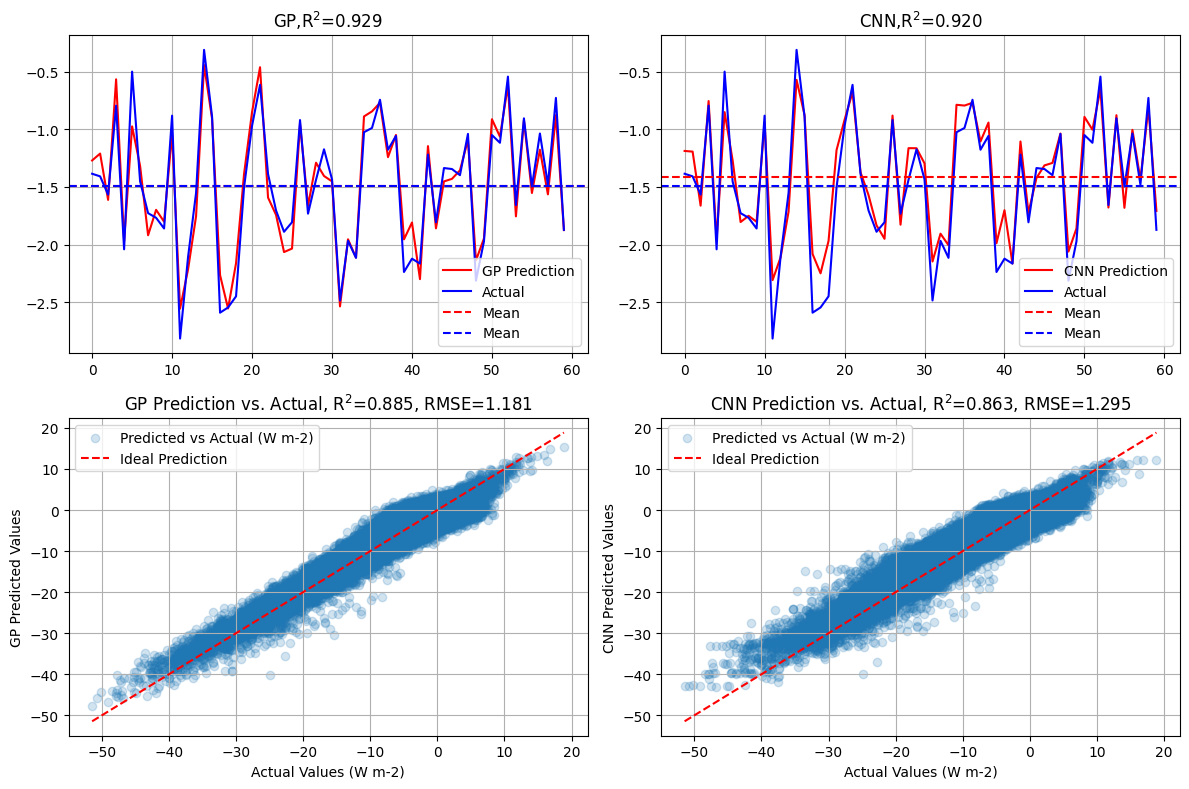

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
from math import sqrt
from sklearn.metrics import mean_squared_error

# Line plots
for ax, pred, title in zip(axs[0], [gp_prediction, nn_prediction], ['GP', 'CNN']):
    rmse_lines = sqrt(mean_squared_error(pred.data.flatten(),Y_test.data.flatten()))
    bias_lines = areaweight(pred,lats).mean() - areaweight(Y_test,lats).mean()
    r2_lines = np.corrcoef(pred.mean(['lat','lon']), Y_test.mean(['lat','lon']))[1][0]**2
    ax.plot(pred.mean(['lat','lon']), color='red', label=f'{title} Prediction')
    ax.plot(Y_test.mean(['lat','lon']), color='blue', label='Actual')

    ax.axhline(y=(pred.mean(['lat', 'lon']).mean()), color='red', linestyle='--', label=f'Mean')  # Horizontal line for mean prediction
    ax.axhline(y=(Y_test.mean(['lat', 'lon']).mean()), color='blue', linestyle='--', label=f'Mean')  # Horizontal line for mean prediction

    ax.set_title(f"{title},R$^{2}$={r2_lines:.3f}")
    ax.legend()
    ax.grid(True)

# Scatter plots
for ax, pred, title in zip(axs[1], [gp_prediction, nn_prediction], ['GP', 'CNN']):
    rmse_lines = sqrt(mean_squared_error(pred.data.flatten(),Y_test.data.flatten()))
    bias_lines = areaweight(pred,lats).mean() - areaweight(Y_test,lats).mean()
    r2_lines = np.corrcoef(pred.data.flatten(), Y_test.data.flatten())[1][0]**2
    min_val, max_val = min(np.min(Y_test), np.min(pred)), max(np.max(Y_test), np.max(pred))
    ax.scatter(Y_test, pred, alpha=0.2, label='Predicted vs Actual (W m-2)')
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
    ax.set_xlabel('Actual Values (W m-2)')
    ax.set_ylabel(f'{title} Predicted Values')
    ax.set_title(f'{title} Prediction vs. Actual, R$^{2}$={r2_lines:.3f}, RMSE={rmse_lines:.3f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/Aerocom/ML_AOD_Methods_plots.png",dpi=300,bbox_inches = 'tight')

#plt.show()


In [17]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# ML=(gp_prediction+nn_prediction)/2
# title='Radiative Forcing'
# # Line plots
# #for ax, pred, title in zip(axs[0], [gp_prediction, ], ['GP']):
#     # rmse_lines = sqrt(mean_squared_error(pred.data.flatten(),Y_test.data.flatten()))
#     # bias_lines = areaweight(pred,lats).mean() - areaweight(Y_test,lats).mean()
# r2_lines = np.corrcoef(ML.mean(['lat','lon']), Y_test.mean(['lat','lon']))[1][0]**2
# ax[0].plot(ML.mean(['lat','lon']), color='red', label=f'{title} Prediction')
# ax[0].plot(Y_test.mean(['lat','lon']), color='blue', label='Actual')

# ax[0].axhline(y=(ML.mean(['lat', 'lon']).mean()), color='red', linestyle='--', label=f'Prediction Mean')  # Horizontal line for mean prediction
# ax[0].axhline(y=(Y_test.mean(['lat', 'lon']).mean()), color='blue', linestyle='--', label=f'Actual Mean')  # Horizontal line for mean prediction

# ax[0].set_title(f"{title} Global Annual Mean,R$^{2}$={r2_lines:.3f}")
# ax[0].set_ylabel(r'RF (W/m$^2$)')
# ax[0].set_xlabel(f'Ensemble Members')

# ax[0].legend()
# ax[0].grid(True)

# # Scatter plots
# # for ax, pred, title in zip(axs[1], [gp_prediction], ['GP', 'CNN']):
# rmse_lines = sqrt(mean_squared_error(ML.data.flatten(),Y_test.data.flatten()))
# bias_lines = areaweight(ML,lats).mean() - areaweight(Y_test,lats).mean()
# r2_lines = np.corrcoef(ML.data.flatten(), Y_test.data.flatten())[1][0]**2
# min_val, max_val = min(np.min(Y_test), np.min(ML)), max(np.max(Y_test), np.max(pred))
# ax[1].scatter(Y_test, ML, alpha=0.2, label='Predicted vs Actual')
# ax[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
# ax[1].set_xlabel('Actual Values')
# ax[1].set_ylabel(f'{title} Predicted Values')
# ax[1].set_title(f'{title} Prediction vs. Actual, R$^{2}$={r2_lines:.3f}, RMSE={rmse_lines:.3f}')
# ax[1].legend()
# ax[1].grid(True)

# plt.tight_layout()
# #plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/Aerocom/ML_AOD_Methods_plots.png",dpi=300,bbox_inches = 'tight')


<xarray.DataArray ()> Size: 8B
array(-1.22525183)
Coordinates:
    sample   int64 8B 0


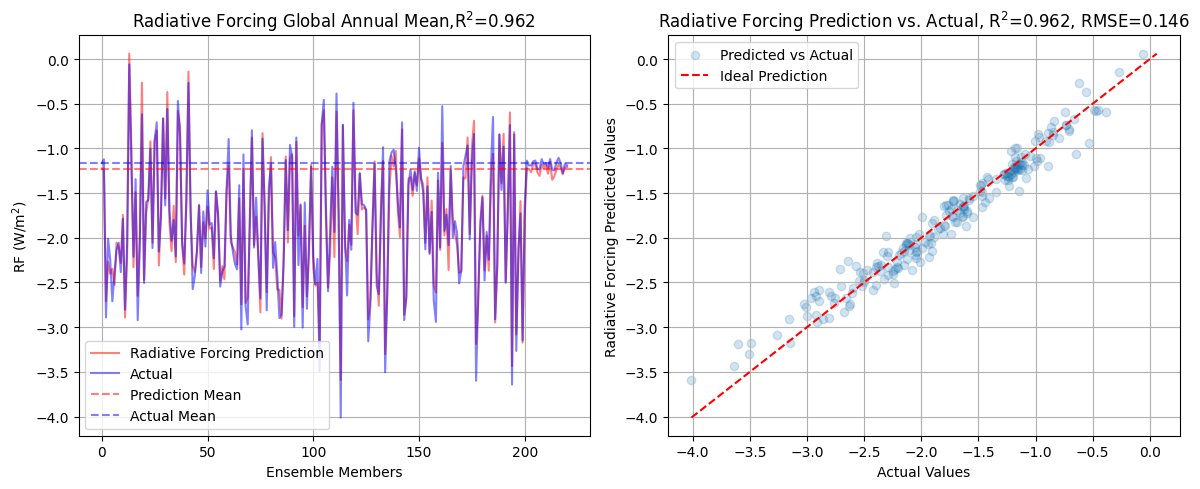

In [43]:
# Based on ALL trained and testing data

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
from math import sqrt
from sklearn.metrics import mean_squared_error
gp_prediction, _ = gp_model_.predict(ppe_para.values)
ML=(gp_prediction)
#ML=(gp_prediction)
#ML=(nn_prediction)

title='Radiative Forcing'
# Line plots
#for ax, pred, title in zip(axs[0], [gp_prediction], ['GP']):
    # rmse_lines = sqrt(mean_squared_error(pred.data.flatten(),Y_test.data.flatten()))
    # bias_lines = areaweight(pred,lats).mean() - areaweight(Y_test,lats).mean()
r2_lines = np.corrcoef(areaweight(ML,lats), areaweight(ppe_var,lats))[1][0]**2
ax[0].plot(areaweight(ML,lats), color='red',alpha=0.5, label=f'{title} Prediction')
ax[0].plot(areaweight(ppe_var,lats), color='blue',alpha=0.5, label='Actual')

ax[0].axhline(y=(areaweight(ML[0],lats)).mean(),alpha=0.5, color='red', linestyle='--', label=f'Prediction Mean')  # Horizontal line for mean prediction
ax[0].axhline(y=(areaweight(ppe_var[0],lats).mean()),alpha=0.5, color='blue', linestyle='--', label=f'Actual Mean')  # Horizontal line for mean prediction

ax[0].set_title(f"{title} Global Annual Mean,R$^{2}$={r2_lines:.3f}")
ax[0].set_ylabel(r'RF (W/m$^2$)')
ax[0].set_xlabel(f'Ensemble Members')

ax[0].legend()
ax[0].grid(True)

# Scatter plots
# for ax, pred, title in zip(axs[1], [gp_prediction], ['GP', 'CNN']):
rmse_lines = sqrt(mean_squared_error(areaweight(ML,lats).data.flatten(),areaweight(ppe_var,lats).data.flatten()))
bias_lines = areaweight(ML,lats).mean() - areaweight(Y_test,lats).mean()
r2_lines = np.corrcoef(areaweight(ML,lats).data.flatten(), areaweight(ppe_var,lats).data.flatten())[1][0]**2
min_val, max_val = min(np.min(areaweight(ML,lats)), np.min(areaweight(ppe_var,lats))), max(np.max(areaweight(ppe_var,lats)), np.max(areaweight(ML,lats)))
ax[1].scatter(areaweight(ppe_var,lats), areaweight(ML,lats), alpha=0.2, label='Predicted vs Actual')
ax[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel(f'{title} Predicted Values')
ax[1].set_title(f'{title} Prediction vs. Actual, R$^{2}$={r2_lines:.3f}, RMSE={rmse_lines:.3f}')
ax[1].legend()
ax[1].grid(True)
print(areaweight(ML[:],lats)[0])
plt.tight_layout()
#plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/Aerocom/ML_AOD_Methods_plots.png",dpi=300,bbox_inches = 'tight')

In [ ]:
from esem.utils import validation_plot, plot_parameter_space, get_random_params, ensemble_collocate
validation_plot(Y_test.data.flatten(), gp_prediction.data.flatten(), _.data.flatten(),
               minx=-3, maxx=1, miny=-3., maxy=1)



In [10]:
# Function to create map plots
def plot_map_Basemap(ax, data, xa, ya, cmap, levels=None, title=None):
    os.chdir('/home/ybhatti/prjs1076/Emulator')

    map_ax = Basemap(llcrnrlon=0., llcrnrlat=-85, urcrnrlon=360., urcrnrlat=85,
                     projection='cyl', resolution='c', ax=ax)
    x, y = map_ax(xa, ya)
    map_ax.drawcoastlines()
    map_ax.drawcountries()
    map_ax.drawmeridians(np.arange(0., 360, 60.), labels=[0, 0, 0, 1], fontsize=8)
    map_ax.drawparallels(np.arange(-90., 90, 30.), labels=[1, 0, 0, 0], fontsize=8)
    if levels is not None:
        cs = map_ax.contourf(x, y, data, levels, extend='both', cmap=cmap)
    else:
        cs = map_ax.contourf(x, y, data, extend='both', cmap=cmap)
    if title:
        ax.set_title(title, fontsize=14)
    return cs


import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from typing import Optional, Dict, Any
from matplotlib.contour import QuadContourSet

from matplotlib.colors import LogNorm

from matplotlib.colors import LogNorm

def plot_map(
    ax: plt.Axes, 
    data: np.ndarray, 
    lons: np.ndarray, 
    lats: np.ndarray, 
    cmap: str, 
    levels: Optional[np.ndarray] = None, 
    title: Optional[str] = None,
    title_fontsize: int = 12,  # Renamed and set a default fontsize for the title
    log_scale: bool = False,  # New parameter to switch to log scale,
    gridline_kwargs: Optional[Dict[str, Any]] = None
) -> QuadContourSet:
    """
    Plots a filled contour map on a specified axis.
    
    Parameters:
        ax (plt.Axes): The matplotlib axis to plot on.
        data (np.ndarray): The data to plot.
        lons (np.ndarray): Longitudes corresponding to the data.
        lats (np.ndarray): Latitudes corresponding to the data.
        cmap (str): Colormap to use for plotting.
        levels (Optional[np.ndarray]): Contour levels; if None, defaults to the colormap levels.
        title (Optional[str]): Title for the plot.
        log_scale (bool): If True, applies a logarithmic color scale.
        gridline_kwargs (Optional[Dict[str, Any]]): Additional keyword arguments for gridlines.
    
    Returns:
        QuadContourSet: The contour set created by the plot.
    """
    # Set projection to PlateCarree for simple lat/lon grids
    projection = ccrs.PlateCarree()

    # Add cyclic point to avoid discontinuities at the 180° meridian
    data, lons = add_cyclic_point(data, coord=lons)

    # Plot map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Default gridline settings
    default_gridline_kwargs = {
        'draw_labels': True,
        'linewidth': 0.5,
        'color': 'gray',
        'alpha': 0.5,
        'linestyle': '--',
        'xlabel_style': {'size': 7},  # Default label font size
        'ylabel_style': {'size': 7}   # Default label font size
    }

    # Update default settings with any user-provided gridline kwargs
    if gridline_kwargs is not None:
        default_gridline_kwargs.update(gridline_kwargs)

    gl = ax.gridlines(**default_gridline_kwargs)  # Apply gridline settings

    # Use LogNorm for logarithmic scaling if log_scale is True
    norm = LogNorm() if log_scale else None

    # Plot the contour or filled contour
    cs = ax.contourf(lons, lats, data, levels=levels, norm=norm, transform=projection, cmap=cmap, extend='both')

    if title:
        ax.set_title(title, fontsize=title_fontsize)  # Set title font size

    return cs


In [11]:
#new_samples = pd.DataFrame(0, index=range(n), columns=ppe_param.columns)
# Extract the PPE_Control row as a Series

def PPE_Uncertainty(n,VARIABLE,ppe_control_values):    
        #data = new_samples
    # Create a new DataFrame with `n` rows, where each row is filled with the `PPE_Control` values
    new_samples = pd.DataFrame([ppe_control_values] * n, index=range(n))

    new_samples[VARIABLE] = np.random.uniform(0, 1, n)  # e.g. V_SCALE_EMI_SS with values between 0.5 and 2.5

    m, sd = gp_model_.batch_stats(new_samples, batch_size=n)
    mnn, sdnn = nn_model.batch_stats(new_samples, batch_size=n)
    print(f"Memory usage: {get_memory_usage()} GB")
    
    print(f"Memory usage: {get_memory_usage()} GB")
    gc.collect()
    return m ,sd, mnn, sdnn

def Total_PPE_Uncertainty(n,ppe_control_values):    
        #data = new_samples
    # Create a new DataFrame with `n` rows, where each row is filled with the `PPE_Control` values
    new_samples = pd.DataFrame([ppe_control_values] * n, index=range(n))

    new_samples[:] = np.random.rand(*new_samples.shape)

    m, sd = gp_model_.batch_stats(new_samples, batch_size=n)
    mnn, sdnn = nn_model.batch_stats(new_samples, batch_size=n)
    print(f"Memory usage: {get_memory_usage()} GB")
    
    print(f"Memory usage: {get_memory_usage()} GB")
    gc.collect()
    return m ,sd, mnn, sdnn

# n=10000
# new_samples = pd.DataFrame([ppe_control_values] * n, index=range(n))

# new_samples[:] = np.random.rand(*new_samples.shape)
# gp_samples, _ = gp_model_.predict(new_samples.values)
# cnn_samples, _ = nn_model.predict(new_samples.values)
# dots=find_diffs(cnn_samples, gp_samples,0)


In [4]:
## Creating index for PPE to be used for uncertainy calculation
def pdf_parameters(n,original_parameter_logged):
# Define the number of samples
#n = 30000  # Adjust as needed

    # Initialize your PDF generator
    pdf_generator = EmissionPDFs()
    
    # Define a dictionary to map PDF functions to new_samples columns
    pdf_mapping = {
        "BC_RAD_PDF": "V_SCALE_BC_RAD_NI",
        "DU_RAD_PDF": "V_SCALE_DU_RAD_NI",
        "DRYDEP_ACC_PDF": "V_SCALE_DRYDEP_ACC",
        "DRYDEP_AIT_PDF": "V_SCALE_DRYDEP_AIT",
        "DRYDEP_COA_PDF": "V_SCALE_DRYDEP_COA",
        "EMI_BB_PDF": "V_SCALE_EMI_BB",
        "EMI_BF_PDF": "V_SCALE_EMI_BF",
        "EMI_ANTH_SO2_PDF": "V_SCALE_EMI_ANTH_SO2",
        "EMI_DUST_PDF": "V_SCALE_EMI_DUST",
        "SO2_CHEM_PDF": "V_SCALE_SO2_REACTIONS",
        "EMI_SSA_PDF": "V_SCALE_EMI_SSA",
        "CMR_BB_PDF": "V_SCALE_EMI_CMR_BB",
        "CMR_BF_PDF": "V_SCALE_EMI_CMR_BF",
        "CMR_FF_PDF": "V_SCALE_EMI_CMR_FF",
        "EMI_DMS_PDF": "V_SCALE_EMI_DMS",
        "EMI_FF_PDF": "V_SCALE_EMI_FF",
        "NUC_FT_PDF": "V_SCALE_NUC_FT",
        "SO4_COATING_PDF": "V_SCALE_SO4_COATING",
        "CLOUD_PH_PDF": "V_SCALE_PH_PERT",
        "WETDEP_BC_PDF": "V_SCALE_WETDEP_BC",
        "WETDEP_IC_PDF": "V_SCALE_WETDEP_IC",
        "KAPPA_SS_PDF": "V_SCALE_KAPPA_SS",
        "KAPPA_SO4_PDF": "V_SCALE_KAPPA_SO4",
        "CDNC_MIN_PDF": "V_SCALE_CDNC_MIN",
       # "VERTICAL_VELOCITY_PDF": "V_SCALE_VERTICAL_VELOCITY",
    }
    
    # Initialize the new_samples DataFrame with correct columns and number of rows
    new_samples = pd.DataFrame(index=range(n), columns=pdf_mapping.values())
    
    # Populate new_samples with samples from each PDF function
    for pdf_func, col_name in pdf_mapping.items():
        # Get the PDF function from the pdf_generator class
        func = getattr(pdf_generator, pdf_func, None)
        if callable(func):
            # Generate samples using the PDF function
            _, _, sam = func(n=n)
            # Assign samples to the appropriate column in new_samples
            new_samples[col_name] = sam
            
    #new_samples.set_index(new_samples.columns[0], inplace=True)
    
    # Create the new row with all columns set to 1, and update specific values
    new_row = {col: 1 for col in new_samples.columns}
    new_row.update({
        'V_SCALE_BC_RAD_NI': 0.71,
        'V_SCALE_DU_RAD_NI': 0.001,
        'V_SCALE_PH_PERT': 5.6020599913279625,
        'V_SCALE_CDNC_MIN': 40,
        'V_SCALE_KAPPA_SO4': 0.6,
        'V_SCALE_EMI_CMR_BB': 75,
        'V_SCALE_EMI_CMR_BF': 30,
        'V_SCALE_EMI_CMR_FF': 30
    })
    
    # Create a DataFrame for the new row
    new_row_df = pd.DataFrame([new_row], index=['Control'])
    
    # Concatenate the new row DataFrame with the original DataFrame
    ppe_params_test = pd.concat([new_row_df, new_samples])
    ppe_params_test['V_SCALE_EMI_CMR_BB'] = ppe_params_test['V_SCALE_EMI_CMR_BB'] * 0.013333333333333334
    ppe_params_test['V_SCALE_EMI_CMR_BF'] = ppe_params_test['V_SCALE_EMI_CMR_BF'] * 0.03333333333333333
    ppe_params_test['V_SCALE_EMI_CMR_FF'] = ppe_params_test['V_SCALE_EMI_CMR_FF'] * 0.03333333333333333
    
    ppe_paramater_test = np.log(ppe_params_test)#.iloc[1:])

    param_pert_test = (ppe_paramater_test - original_parameter_logged.min())/(original_parameter_logged.max() - original_parameter_logged.min())
    #param_pert_test = ppe_paramater_test.apply(normalize, axis=0)
    return param_pert_test,ppe_params_test


def parameter_testing(table,PARAMETER):
    para_table=copy.deepcopy(table)
    # Assuming 'Control' row is the first row (index 0)
    control_row = para_table.iloc[0]
    
    # Update all rows to match the Control row, except for Variable
    for column in table.columns:
        if column != PARAMETER:
            para_table[column] = control_row[column]
    return para_table

In [145]:
## Creating index for PPE to be used for uncertainy calculation
def pdf_parameters_uniform(n,original_parameter_logged):
# Define the number of samples
#n = 30000  # Adjust as needed

    # Initialize your PDF generator
    pdf_generator = EmissionPDFs_Uniform()
    
    # Define a dictionary to map PDF functions to new_samples columns
    pdf_mapping = {
        "BC_RAD_PDF": "V_SCALE_BC_RAD_NI",
        "DU_RAD_PDF": "V_SCALE_DU_RAD_NI",
        "DRYDEP_ACC_PDF": "V_SCALE_DRYDEP_ACC",
        "DRYDEP_AIT_PDF": "V_SCALE_DRYDEP_AIT",
        "DRYDEP_COA_PDF": "V_SCALE_DRYDEP_COA",
        "EMI_BB_PDF": "V_SCALE_EMI_BB",
        "EMI_BF_PDF": "V_SCALE_EMI_BF",
        "EMI_ANTH_SO2_PDF": "V_SCALE_EMI_ANTH_SO2",
        "EMI_DUST_PDF": "V_SCALE_EMI_DUST",
        "SO2_CHEM_PDF": "V_SCALE_SO2_REACTIONS",
        "EMI_SSA_PDF": "V_SCALE_EMI_SSA",
        "CMR_BB_PDF": "V_SCALE_EMI_CMR_BB",
        "CMR_BF_PDF": "V_SCALE_EMI_CMR_BF",
        "CMR_FF_PDF": "V_SCALE_EMI_CMR_FF",
        "EMI_DMS_PDF": "V_SCALE_EMI_DMS",
        "EMI_FF_PDF": "V_SCALE_EMI_FF",
        "NUC_FT_PDF": "V_SCALE_NUC_FT",
        "SO4_COATING_PDF": "V_SCALE_SO4_COATING",
        "CLOUD_PH_PDF": "V_SCALE_PH_PERT",
        "WETDEP_BC_PDF": "V_SCALE_WETDEP_BC",
        "WETDEP_IC_PDF": "V_SCALE_WETDEP_IC",
        "KAPPA_SS_PDF": "V_SCALE_KAPPA_SS",
        "KAPPA_SO4_PDF": "V_SCALE_KAPPA_SO4",
        "CDNC_MIN_PDF": "V_SCALE_CDNC_MIN",
       # "VERTICAL_VELOCITY_PDF": "V_SCALE_VERTICAL_VELOCITY",
    }
    
    # Initialize the new_samples DataFrame with correct columns and number of rows
    new_samples = pd.DataFrame(index=range(n), columns=pdf_mapping.values())
    
    # Populate new_samples with samples from each PDF function
    for pdf_func, col_name in pdf_mapping.items():
        # Get the PDF function from the pdf_generator class
        func = getattr(pdf_generator, pdf_func, None)
        if callable(func):
            # Generate samples using the PDF function
            _, _, sam = func(n=n)
            # Assign samples to the appropriate column in new_samples
            new_samples[col_name] = sam
            
    #new_samples.set_index(new_samples.columns[0], inplace=True)
    
    # Create the new row with all columns set to 1, and update specific values
    new_row = {col: 1 for col in new_samples.columns}
    new_row.update({
        'V_SCALE_BC_RAD_NI': 0.71,
        'V_SCALE_DU_RAD_NI': 0.001,
        'V_SCALE_PH_PERT': 5.6020599913279625,
        'V_SCALE_CDNC_MIN': 40,
        'V_SCALE_KAPPA_SO4': 0.6,
        'V_SCALE_EMI_CMR_BB': 75,
        'V_SCALE_EMI_CMR_BF': 30,
        'V_SCALE_EMI_CMR_FF': 30
    })
    
    # Create a DataFrame for the new row
    new_row_df = pd.DataFrame([new_row], index=['Control'])
    
    # Concatenate the new row DataFrame with the original DataFrame
    ppe_params_test = pd.concat([new_row_df, new_samples])
    ppe_params_test['V_SCALE_EMI_CMR_BB'] = ppe_params_test['V_SCALE_EMI_CMR_BB'] * 0.013333333333333334
    ppe_params_test['V_SCALE_EMI_CMR_BF'] = ppe_params_test['V_SCALE_EMI_CMR_BF'] * 0.03333333333333333
    ppe_params_test['V_SCALE_EMI_CMR_FF'] = ppe_params_test['V_SCALE_EMI_CMR_FF'] * 0.03333333333333333
    
    ppe_paramater_test = np.log(ppe_params_test)#.iloc[1:])

    param_pert_test = (ppe_paramater_test - original_parameter_logged.min())/(original_parameter_logged.max() - original_parameter_logged.min())
    #param_pert_test = ppe_paramater_test.apply(normalize, axis=0)
    return param_pert_test,ppe_params_test


def parameter_testing(table,PARAMETER):
    para_table=copy.deepcopy(table)
    # Assuming 'Control' row is the first row (index 0)
    control_row = para_table.iloc[0]
    
    # Update all rows to match the Control row, except for Variable
    for column in table.columns:
        if column != PARAMETER:
            para_table[column] = control_row[column]
    return para_table

## Identify regional uncertainty:

In [ ]:



# Correct the figure and axes creation to include projection
fig, ax = plt.subplots(1, 3, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Example contour levels
# clevs = np.arange(0, 10 + 0.5, 0.5)
# clevs_diff = np.arange(-3, 3 + 0.5, 0.5)
## AOD
clevs = np.arange(0, 0.1 + 0.01, 0.01)
clevs_diff = np.arange(-0.01, 0.01 + 0.002, 0.002)
## RF
clevs = np.arange(0, 1 + 0.01, 0.01)
clevs_diff = np.arange(-3, 3 + 0.5, 0.5)
clevs = np.array([0, 0.001, 0.05, 0.1, 2])

clevs = np.logspace(-3, 0, 10)  # From 0.001 to 1 on a log scale
norm = mcolors.LogNorm(vmin=0.001, vmax=1)

clevs = np.arange(0, 0.2 + 0.02, 0.02)
#clevs_diff = np.arange(-0.05, 0.05, 0.01)

#clevs[clevs == 0] = 1e-10  # Ensure no zero values for LogNorm

# Call the plot_map function
# Plot data in the first subplot # overall std 
cs1 = plot_map(ax[0], sdnnpi.data, lons, lats, 'viridis', clevs,'PI std')

# Plot data in the second subplot
# Custom gridline settings including font size and axis label visibility
gridline_options = {
    'draw_labels': True,
    'xlabel_style': {'size': 7},  # Custom x-axis label font size
    'ylabel_style': {'size': 0}  # Custom y-axis label font size
}

cs2 = plot_map(ax[1], sdnnpd.data, lons, lats, 'viridis', clevs,' PD std',gridline_kwargs=gridline_options)

# Plot the difference in the third subplot
cs3 = plot_map(ax[2], sdnndi, lons, lats, 'viridis', clevs, 'Spread of PD-PI Difference')
#[m,n] = np.where(dots==0)
#[m,n] = np.where(p_value>0.05)

# z1 = np.zeros(p_value.shape)
# z1[m,n]=99
# ax[2].contourf(lons, lats, z1, 1, hatches=['', '..'], alpha=0)
ax[2].set_ylabel('Difference (GP - CNN)')  # Set a custom label for the y-axis

shrink=1

cbar1 = plt.colorbar(cs1, ax=ax[0], orientation='horizontal', pad=0.05, aspect=20, shrink=shrink)
cbar2 = plt.colorbar(cs2, ax=ax[1], orientation='horizontal', pad=0.05, aspect=20, shrink=shrink)
cbar3 = plt.colorbar(cs3, ax=ax[2], orientation='horizontal', pad=0.05, aspect=20, shrink=shrink)
#ax[1].set_axis_off()  # Hide the entire y-axis for the middle plot
#cbar3.set_ticks(np.arange(-0.05, 0.05, 0.025)) 
#cbar3.set_ticks([-0.05, -0.02,0,0.02,0.05])
plt.suptitle('AOD PPE Spread', y=0.495,fontsize=15)
# Show the plot
#plt.show()

plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/Aerocom/CNN_AOD_Spread.png",dpi=300,bbox_inches = 'tight')


In [5]:
from scipy.stats import gaussian_kde
n=1000
# para_mod = copy.deepcopy(para)
# para_mod["V_SCALE_CDNC_MIN"] = 1

para_norm,para = pdf_parameters(n,ppe_paramater)
gp_prediction, _ = gp_model_.predict(para_norm)


means_ERF = areaweight(gp_prediction,lats)
print(means_ERF.mean())
# kde_erf = gaussian_kde(means_ERF, bw_method=1)  # Kernel Density Estimation
# x_range = np.linspace(min(means_ERF), max(means_ERF), len(means_ERF))  # Create range for x-axis

/home/ybhatti/yusufb/miniconda3/envs/ESM/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


NameError: name 'gp_model_' is not defined

/home/ybhatti/.local/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


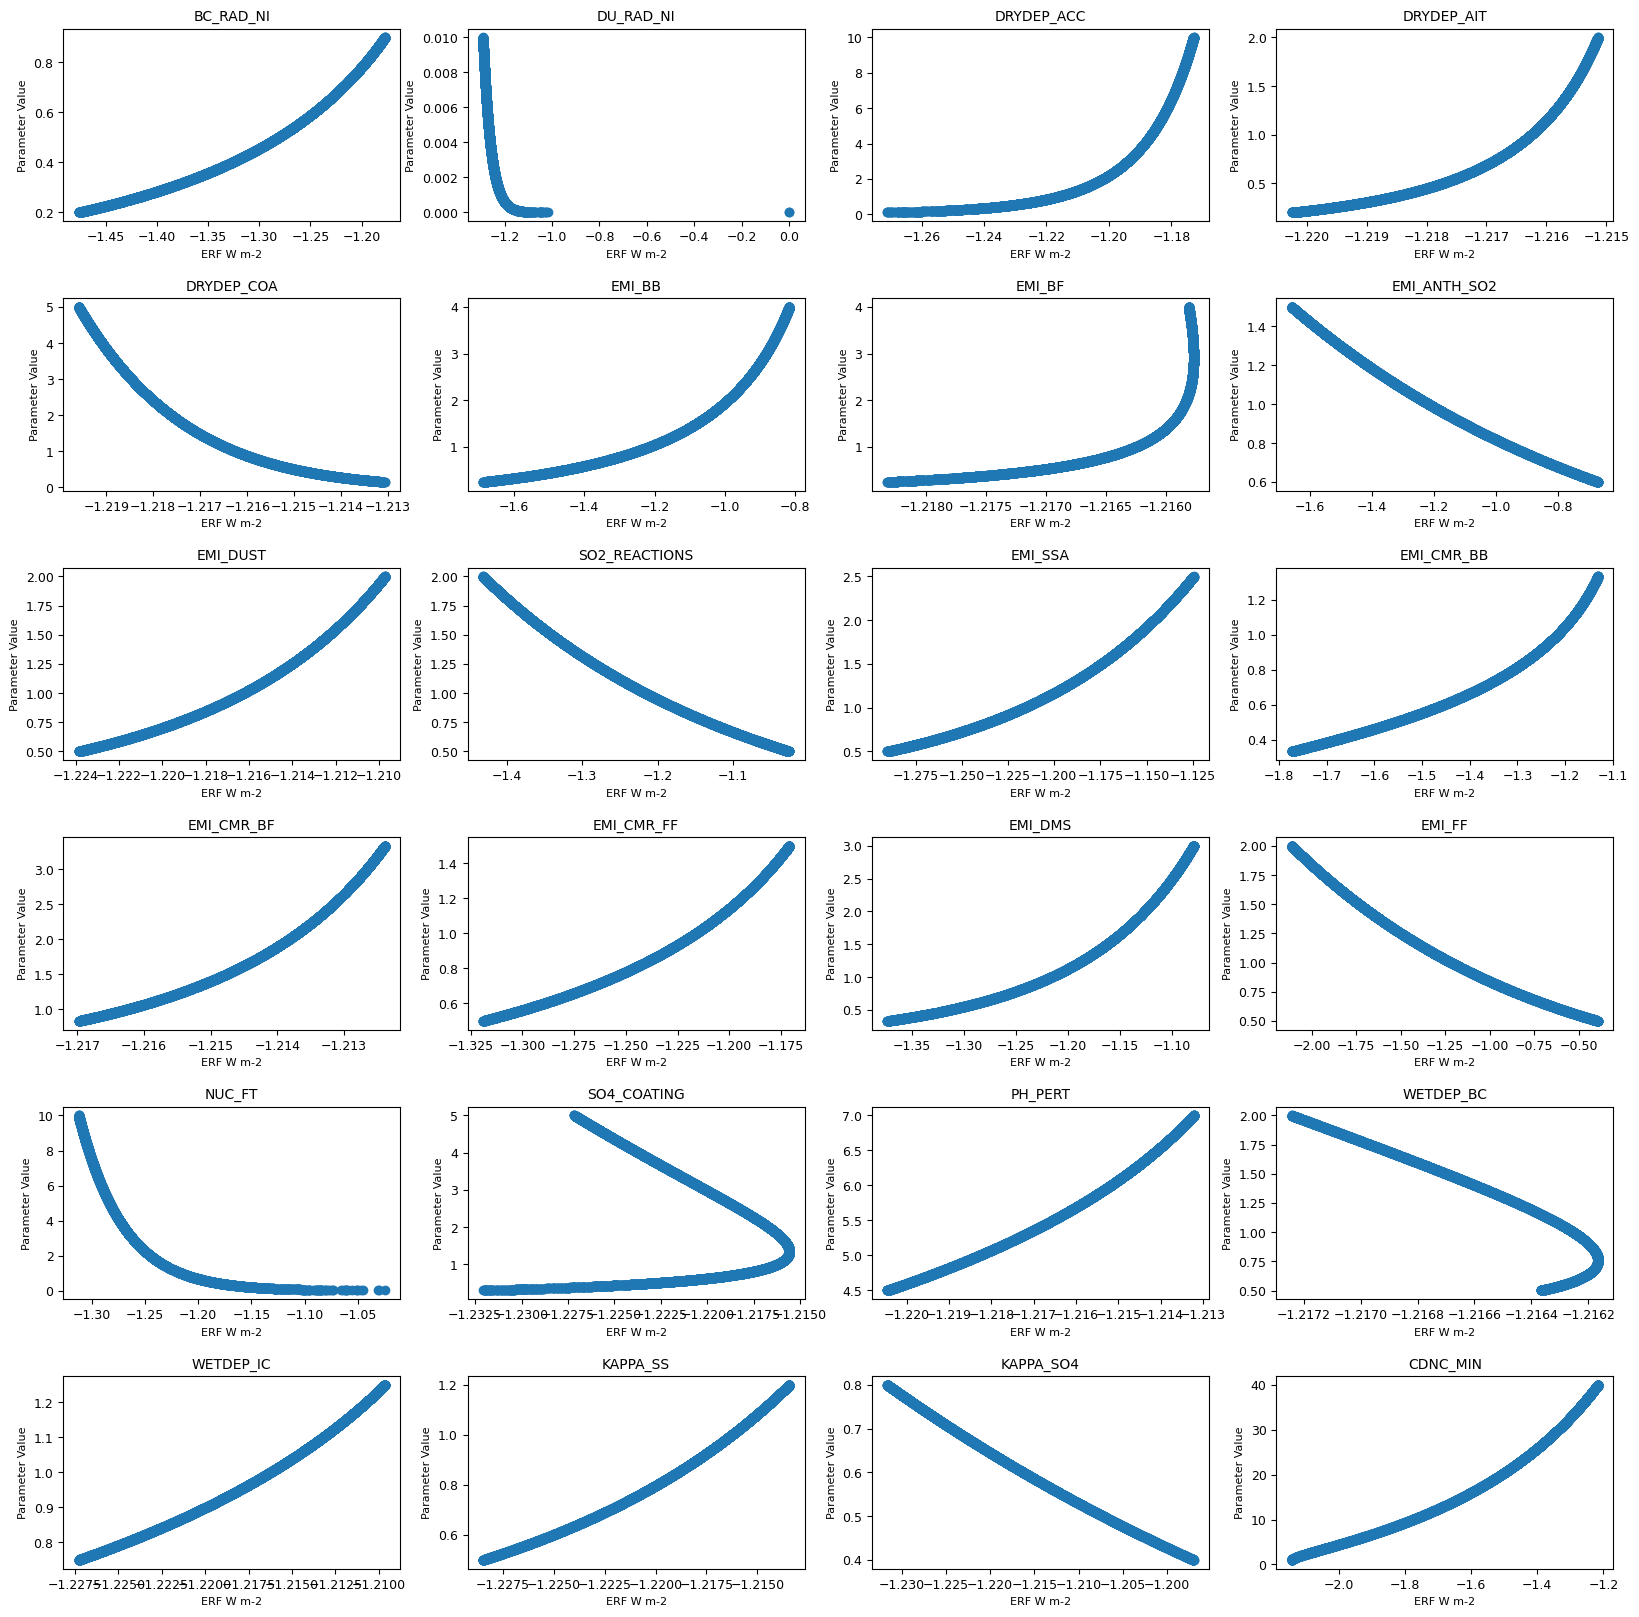

In [212]:
# Drop the 'Control' row if necessary
#df = para.iloc[1:].astype(float)
# Remove "V_SCALE_" from column names
from PDFs_Uniform import *

import pandas as pd
import copy
import re
n = 10000
norm_para, para = pdf_parameters_uniform(n, ppe_paramater)

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20),  # Adjust based on number of parameters
                       gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

axes = axes.flatten()


#norm_para,para = pdf_parameters(10000)
# Initialize an empty list to hold the results
results = []
std=[]
for col,i in zip(para.columns,range(0,len(para.columns))):

    # Generate NEW parameters for each iteration

    # Process and predict
    norm_param = parameter_testing(norm_para, col)
    gp_prediction, _ = gp_model_.predict(norm_param.values)

    # Calculate metrics
    pa = para[col]

    gpmeans = areaweight(gp_prediction, lats)
    corr = np.corrcoef(gpmeans, pa)[1][0]
    clean_col = re.sub(r'^V_SCALE_', '', col)

    axes[i].scatter(gpmeans, pa)
    axes[i].set_title(f"{clean_col}", fontsize=10)

    axes[i].set_xlabel("ERF W m-2", fontsize=8)
    axes[i].set_ylabel("Parameter Value", fontsize=8)
    #axes[i].set_xlim(-1.4, -1)  # Set x-axis limits
    #axes[i].set_yticks([])  # Remove x-axis ticks
    axes[i].tick_params(axis="x", labelsize=9)  # Increase y-tick size
    axes[i].tick_params(axis="y", labelsize=9)  # Increase y-tick size
plt.savefig("/home/ybhatti/prjs1076/Plots/Relationship_Parameter_PD_RF.png",dpi=300,bbox_inches = 'tight')


In [ ]:
import pandas as pd
import copy
n = 100

#norm_para,para = pdf_parameters(n)
gp_prediction, _ = gp_model_.predict(ppe_para.values)
Predicted_Control = (gp_prediction )
#norm_para,para = pdf_parameters(10000)
# Initialize an empty list to hold the results
results = []
std=[]
ERF_mean = areaweight(Predicted_Control[0],lats).mean()
for col in (para.columns):
    norm_para,para = pdf_parameters(n,ppe_paramater)
    print(col)
    norm_param = parameter_testing(norm_para,col)
    gp_prediction, _ = gp_model_.predict(norm_param.values)
    pa = para[col]

    gpmeans = areaweight(gp_prediction,lats)
    plt.scatter(gpmeans,pa)
    print(np.corrcoef(gpmeans,pa)[1][0])

In [59]:
import pandas as pd
import copy
n = 1000

#norm_para,para = pdf_parameters(n)
gp_prediction, _ = gp_model_.predict(ppe_para.values)
Predicted_Control = (gp_prediction )
#norm_para,para = pdf_parameters(10000)
# Initialize an empty list to hold the results
results = []
std=[]
ERF_mean = areaweight(Predicted_Control[0],lats).mean()
for col in (para.columns):
    norm_para,para = pdf_parameters(n,ppe_paramater)
    print(col)
    norm_param = parameter_testing(norm_para,col)
    gp_prediction, _ = gp_model_.predict(norm_param.values)

    gpmeans = areaweight(gp_prediction,lats)
    std.append(gp_prediction.std('sample'))
    gp_uncert = gpmeans.std()
    gp_mean = gpmeans.mean()
    # ERF_Contribution = gp_mean - ERF_mean
    # ERF_Contribution_PERC = ((gp_mean / ERF_mean)-1)*100
#    difference = gpmeans - nnmeans

    # print(f'min = {means.min()}')
    # print(f'max = {means.max()}')
   # print(f'std = {gp_uncert.data}')
    # print(f'ERF_Contribution = {ERF_Contribution.data}')
    # print(f'ERF_Contribution_PERC = {ERF_Contribution_PERC.data}')

  #  print('---------------------')
    
    # Append the results as a dictionary
    results.append({
        'Variable': col,
        'std': gp_uncert.data,
        '5%': np.percentile(gpmeans,5),
        '95%': np.percentile(gpmeans,95),
        'range': (np.percentile(gpmeans,5) - np.percentile(gpmeans,95)),
        # 'ERF_Contribution': ERF_Contribution.data,
        # 'ERF_Contribution_PERC': ERF_Contribution_PERC.data,
        '%range': (np.percentile(gpmeans,95) - np.percentile(gpmeans,5)),

#        'CNN_std': nnmeans,
#        'Diff': difference
    })


    
# Convert results into a DataFrame for better presentation
# Sort the DataFrame by the 'Diff' column
results_df = pd.DataFrame(results)


V_SCALE_BC_RAD_NI
V_SCALE_DU_RAD_NI
V_SCALE_DRYDEP_ACC
V_SCALE_DRYDEP_AIT
V_SCALE_DRYDEP_COA
V_SCALE_EMI_BB
V_SCALE_EMI_BF
V_SCALE_EMI_ANTH_SO2
V_SCALE_EMI_DUST
V_SCALE_SO2_REACTIONS
V_SCALE_EMI_SSA
V_SCALE_EMI_CMR_BB
V_SCALE_EMI_CMR_BF
V_SCALE_EMI_CMR_FF
V_SCALE_EMI_DMS
V_SCALE_EMI_FF
V_SCALE_NUC_FT
V_SCALE_SO4_COATING
V_SCALE_PH_PERT
V_SCALE_WETDEP_BC
V_SCALE_WETDEP_IC
V_SCALE_KAPPA_SS
V_SCALE_KAPPA_SO4
V_SCALE_CDNC_MIN


In [60]:
numeric_cols = ['std', '5%', '95%']

sorted_results_gp = results_df.sort_values(by='std', ascending=False).reset_index(drop=True)

dec=4
sorted_results_gp = sorted_results_gp.assign(**{
    col: sorted_results_gp[col].apply(lambda x: f"{x:.{dec}f}") for col in [ 'std', '5%','95%']
})


In [50]:
sorted_results_gp

,Variable,std,5%,95%,range,%range
0,V_SCALE_CDNC_MIN,0.1581,-1.6295,-1.1282,-5.013076e-01,5.013076e-01
1,V_SCALE_EMI_FF,0.1373,-1.3235,-0.8741,-4.494224e-01,4.494224e-01
2,V_SCALE_EMI_ANTH_SO2,0.0986,-1.2703,-0.9413,-3.290073e-01,3.290073e-01
3,V_SCALE_EMI_CMR_BB,0.0697,-1.2492,-1.0263,-2.229267e-01,2.229267e-01
4,V_SCALE_NUC_FT,0.0604,-1.1737,-0.9854,-1.883670e-01,1.883670e-01
5,V_SCALE_SO2_REACTIONS,0.0601,-1.2017,-1.0032,-1.985316e-01,1.985316e-01
6,V_SCALE_DU_RAD_NI,0.0575,-1.1918,-1.0037,-1.881326e-01,1.881326e-01
7,V_SCALE_EMI_BB,0.0550,-1.2268,-1.0491,-1.776501e-01,1.776501e-01
8,V_SCALE_EMI_DMS,0.0433,-1.1973,-1.0535,-1.437881e-01,1.437881e-01
9,V_SCALE_EMI_SSA,0.0320,-1.1736,-1.0684,-1.052034e-01,1.052034e-01


In [24]:
aod_modis = xr.open_mfdataset('/home/ybhatti/prjs1076/Observational_Data/2003-2014/regridded/g4.timeAvg.MYD08_M3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean.2010*',combine='nested',concat_dim='month').MYD08_M3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean.load().mean('month')
lats_modis = aod_modis.mean('lon')

AOD_PPE = xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/AOD_3_million.nc')['Emulated TAU_2D_550nm'][:1000000]
# n=100000
# para_norm,para = pdf_parameters(n,ppe_paramater)
# gp_prediction, _ = gp_model_.predict(para_norm.values)
# nn_prediction, _ = nn_model.predict(para_norm.values)
# ML=(gp_prediction+nn_prediction)/2
#lats_ML = AOD_PPE.mean('lon')

def find_diffs(run10,run1,axis1):
    t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]
    diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
    return diff
dots=find_diffs(AOD_PPE,aod_modis,0)


/scratch-local/ybhatti.8996313/ipykernel_491340/3438536675.py:13: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]
/scratch-local/ybhatti.8996313/ipykernel_491340/3438536675.py:13: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]

KeyboardInterrupt



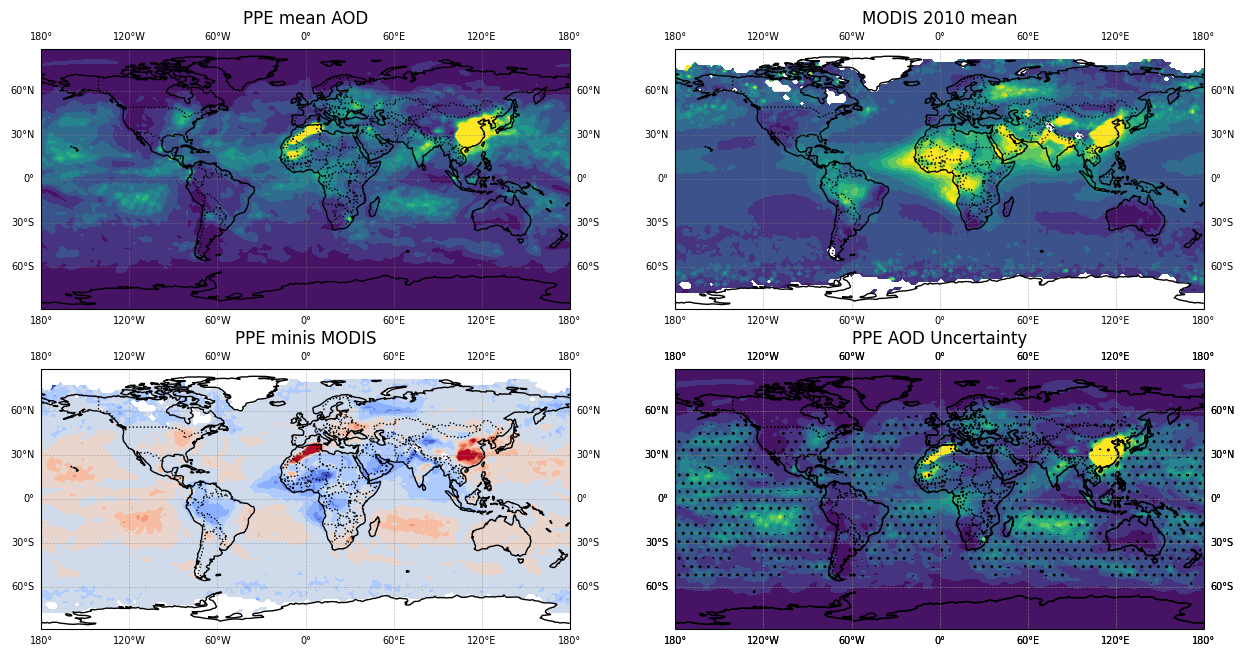

In [168]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(hspace=-0.53)#x=np.arange(40,70,5)
clevs=np.arange(0,0.5+0.05,0.05)
clevs_std=np.arange(0,0.1+0.01,0.01)
xa,ya  = np.meshgrid(lons,lats)

clevs_diff=np.arange(-0.5,0.5+0.1,0.1)
diff = (ML.mean('sample').data-aod_modis.data)
plot_map(ax[0][0],ML.mean('sample'),lons,lats,'viridis',clevs)
plot_map(ax[0][1],aod_modis,lons,lats,'viridis',clevs)
plot_map(ax[1][0],diff,lons,lats,'coolwarm',clevs_diff)
plot_map(ax[1][1],ML.std('sample'),lons,lats,'viridis',clevs_std)

plot_map(ax[1][1],ML.std('sample'),lons,lats,'viridis',clevs_std)

#map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
#                    resolution ='c',ax=ax[1][0])
#x, y = map_ax1(xa,ya) 
#1 indicates it is not statistically significant; 0 indicates it is
[m,n] = np.where(dots==1)
z1 = np.zeros(dots.shape)
z1[m,n]=99
ax[1][1].contourf(lons, lats, z1, 1, hatches=['', '..'], alpha=0)

ax[0][0].set_title('PPE mean AOD')
ax[0][1].set_title('MODIS 2010 mean')
ax[1][0].set_title('PPE minis MODIS')
ax[1][1].set_title('PPE AOD Uncertainty')

plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/AMS/AOD_MODIS_Comparison.png",dpi=300,bbox_inches = 'tight')


In [29]:
# Function to extract date from filename
def extract_date(file_path):
    # Assuming date format is in 'YYYYMMDD' as 'SRON-POLDER-L2-YYYYMMDD-LAND'
    filename = os.path.basename(file_path)
    date_str = filename.split('-')[3]  # Extracts the 'YYYYMMDD' part
    return date_str
def convert_julday_to_hours(file):
    #date=xr.open_dataset(file).julday.load()
    # Extract the fractional part of the day
    fractional_part = file - file.astype(int)
    # Convert to hours
    hours = fractional_part * 24
    julday_with_hours = hours.assign_coords(hours=hours)

    return julday_with_hours
    
def create_datetime_xarray(months, days, hours, reference_time):
    """
    Converts month, day, and hour arrays into a datetime xarray.DataArray 
    mapped to a reference time array.
    
    Parameters:
    - months: Array of month values (1-12).
    - days: Array of day values (1-31).
    - hours: Array of hour values (0.0-24.0).
    - reference_time: Reference xarray.DataArray with datetime64[ns] values.
    
    Returns:
    - datetime_xr: xarray.DataArray of datetimes corresponding to the input.
    """
    # Generate a meshgrid of months, days, and hours for combinations
    months, days, hours = np.meshgrid(months, days, hours, indexing="ij")
    
    # Combine the components into a pandas datetime object
    datetimes = pd.to_datetime({
        "year": reference_time.dt.year.values[0],
        "month": months.flatten(),
        "day": days.flatten(),
        "hour": hours.flatten().astype(int),
        "minute": ((hours.flatten() % 1) * 60).astype(int)
    }, errors='coerce')  # coerce invalid dates into NaT

    # Reshape into the original dimensions
    datetimes = datetimes.values.reshape(months.shape)
    
    # Create an xarray.DataArray
    datetime_xr = xr.DataArray(
        datetimes,
        dims=("month", "day", "hour"),
        coords={"month": np.unique(months), "day": np.unique(days), "hour": np.unique(hours)}
    )

    return datetime_xr
def find_nearest(array, value): # GPT
    return np.abs(array - value).argmin()
# def find_nearest(array, value): ### MINE 
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return array[idx]

def POLDER_Ensemble(MODEL_Overpass,POLDER_variable_Data):
    reference_time = xr.DataArray(
        pd.date_range("2010-01-01", "2010-12-31", freq="3h"),
        dims="time",
        name="time"
    )
    
    combined = xr.concat(MODEL_Overpass, dim="overpass").sortby('ensemble')
    dataset0 = xr.DataArray(
    POLDER_variable_Data[i],    dims=["overpass"],
        coords={"overpass": np.arange(len(MODEL_Overpass))}  # Adjust the length to match "overpass"
    )
    # Create a new ensemble coordinate for dataset0
    new_ensemble_id = -1  # New ensemble identifier
    
    # Align dataset0 to the overpass dimension
    dataset0_aligned = xr.DataArray(
        dataset0.values,  # Values from dataset0
        dims=["overpass"],  # Use the existing overpass dimension
        coords={"overpass": combined["overpass"]}  # Align with the original overpass
    )
    
    # Add the ensemble dimension and coordinate to dataset0_aligned
    dataset0_expanded = dataset0_aligned.expand_dims("ensemble")
    dataset0_expanded["ensemble"] = [new_ensemble_id]  # Assign the new ensemble coordinate
    
    # Concatenate the updated dataset along the ensemble dimension
    updated_data = xr.concat([combined, dataset0_expanded], dim="ensemble")
    return updated_data

def PDF_For_POLDER(Flat_Data_PPE,Flat_Obs):
    # Remove NaNs if any
    flat_obv = Flat_Data_PPE[~np.isnan(Flat_Data_PPE)]
    obs_spatial = Flat_Obs[~np.isnan(Flat_Obs)]
    
    # Kernel Density Estimate (KDE) for the PDF of flat_obv
    kde_flat_obv = stats.gaussian_kde(flat_obv, bw_method='scott')  # Bandwidth 'scott' or 'silverman'
    
    # KDE for the PDF of obs_spatial
    kde_obs_spatial = stats.gaussian_kde(obs_spatial, bw_method='scott')
    
    # Generate a range of values for plotting the PDFs
    x_flat_obv = np.linspace(np.min(flat_obv), np.max(flat_obv), 1000)
    x_obs_spatial = np.linspace(np.min(obs_spatial), np.max(obs_spatial), 1000)
    
    # Evaluate the KDE over the range
    pdf_flat_obv = kde_flat_obv(x_flat_obv)
    pdf_obs_spatial = kde_obs_spatial(x_obs_spatial)
    return x_flat_obv, pdf_flat_obv, x_obs_spatial, pdf_obs_spatial


In [28]:
# import glob
# # Define the input directory containing the .nc files
# input_dir = "/home/ybhatti/prjs1076/Observational_Data/POLDER_1.0x1.0_basedon0.1_NPge2/2009/LAND"
# file_list = glob.glob(input_dir+'/*.nc')
# sorted_files = sorted(file_list, key=extract_date)

# # Define the output directory to save transformed files
# output_dir = "/home/ybhatti/prjs1076/Observational_Data/POLDER_Processed"
# os.makedirs(output_dir, exist_ok=True)
# lats_POL=[]
# lons_POL=[]
# time_POL=[]
# day_POL=[]
# month_POL=[]
# ANG_POL=[]
# AOT_POL=[]
# SSA_POL=[]

# # Loop through all .nc files in the directory
# for file in (sorted_files):
#     # Load the dataset
#     month_POL.append(xr.open_dataset(file).month.load().data)
#     day_POL.append(xr.open_dataset(file).day.load().data)
#     SSA_POL.append(xr.open_dataset(file).SSA.load()[:,7].data)
#     ANG_POL.append(xr.open_dataset(file).AE_490_670.load()[:].data)
#     AOT_POL.append(xr.open_dataset(file).AOT550.load()[:].data)
#     lats_POL.append(xr.open_dataset(file).lat.load().data)
#     lons_POL.append(xr.open_dataset(file).assign_coords(lon=((xr.open_dataset(file).lon + 360) % 360)).lon.load().data)
#     time_POL.append(convert_julday_to_hours(xr.open_dataset(file).julday).load().data)
#     #end
#         # # Apply the transformation: convert lat/lon to 2D
#        # dataset_2d = dataset.set_index({'len': ['lat', 'lon']}).unstack('len')



KeyboardInterrupt



In [190]:
# model_time=ANG_HF_PD.time.dt.dayofyear
# # Assuming the 'times' and 'month_soap' are already initialized
# for i in range(len(lats_POL)):
#     times_recorded=[]
#     OVERPASS_ANG=[]
#     OVERPASS_SSA=[]
#     OVERPASS_AOD=[]
    
#     for la in range(len(lats_POL[i])):
#         latt = find_nearest(lats, lats_POL[i][la])  # Find the nearest latitude
#         lonss = find_nearest(lons, lons_POL[i][la])  # Find the nearest longitude
#         OBS_TIME=create_datetime_xarray(month_POL[i][la],day_POL[i][la],time_POL[i][la],reference_time)
#         time_index = find_nearest(ANG_HF_PD.time, OBS_TIME)  # Find the nearest longitude
            
#         # Extract the model value (ANG_550nm_865nm) at the closest grid point
#         ANG_model_value = ANG_HF_PD.isel(time=time_index, lat=latt, lon=lonss)#.values
#         SSA_model_value = SSA_HF_PD.isel(time=time_index, lat=latt, lon=lonss)#.values
#         AOD_model_value = AOD_HF_PD.isel(time=time_index, lat=latt, lon=lonss)#.values

#         OVERPASS_ANG.append(ANG_model_value)  # Store the model value for this point
#         OVERPASS_SSA.append(SSA_model_value)  # Store the model value for this point
#         OVERPASS_AOD.append(AOD_model_value)  # Store the model value for this point

#         # Record the corresponding time
#         times_recorded.append(str(ANG_HF_PD.time.isel(time=time_index).values))

#     updated_data_ANG = POLDER_Ensemble(OVERPASS_ANG,ANG_POL)
#     updated_data_AOD = POLDER_Ensemble(OVERPASS_AOD,AOT_POL)
#     updated_data_SSA = POLDER_Ensemble(OVERPASS_SSA,SSA_POL)

#    # end
#     updated_data_ANG.to_netcdf(f'/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Pre_Processed/POLDER/LAND/ANG/Polder_Overpass_Day_{i+1}.nc')
#     updated_data_AOD.to_netcdf(f'/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Pre_Processed/POLDER/LAND/AOD/Polder_Overpass_Day_{i+1}.nc')
#     updated_data_SSA.to_netcdf(f'/home/ybhatti/prjs1076/Processed_Data/PD/Observational_Comparison/Pre_Processed/POLDER/LAND/SSA/Polder_Overpass_Day_{i+1}.nc')

#     times_recorded=[]
#     OVERPASS_ANG=[]
#     OVERPASS_SSA=[]
#     OVERPASS_AOD=[]
#     # if i ==2:
#     #     end


# Compare PPE with POLDER

In [13]:
n = 10000
norm_para,para = pdf_parameters(n,ppe_paramater)
#gp_prediction, _ = gp_model_.predict(norm_para.values)

# n=10000
# para_norm,para = pdf_parameters(n,ppe_paramater)
# gp_prediction, _ = gp_model_.predict(para_norm.values)


In [23]:
gp_prediction_ssa, _ = gp_model_.predict(norm_para.values)

# POLDER_Data_SSA = SSA_PPE[-1].data.flatten()
# POLDER_PPE_SSA  = gp_prediction.data.flatten()
# flat_PPE_SSA = POLDER_PPE_SSA[~np.isnan(POLDER_PPE_SSA)]
# obs_spatial_SSA = POLDER_Data_SSA[~np.isnan(POLDER_Data_SSA)]
# def find_diffs(run10,run1,axis1):
#     t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]
#     diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
#     return diff
# #dots_ssa=find_diffs(gp_prediction_ssa,SSA_PPE[-1].mean('month'),0)
# n = 10000

gp_prediction_ssa_nans = xr.where(gp_prediction_ssa == 0, np.nan, gp_prediction_ssa)

#kde_ssa = gaussian_kde(flat_PPE_SSA, bw_method=1)  # Kernel Density Estimation
#x_range_ssa = np.linspace(flat_PPE_SSA.min().item(), flat_PPE_SSA.max().item(), n)
gp_prediction_ssa_nans.to_netcdf('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Raw/SSA_Comparison_POLDER_10000_2009.nc')

In [15]:
gp_prediction_aod, _ = gp_model_.predict(norm_para.values)

# POLDER_Data_AOD = AOD_PPE[-1].mean('month').data.flatten()
# POLDER_PPE_AOD  = gp_prediction.data.flatten()
# flat_PPE_AOD = POLDER_PPE_AOD[~np.isnan(POLDER_PPE_AOD)]
# obs_spatial_AOD = POLDER_Data_AOD[~np.isnan(POLDER_Data_AOD)]
# def find_diffs(run10,run1,axis1):
#     t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]
#     diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
#     return diff
# dots_aod=find_diffs(gp_prediction_aod,AOD_PPE[-1].mean('month'),0)
# n = 10000
gp_prediction_aod_nans = xr.where(gp_prediction_aod == 0, np.nan, gp_prediction_aod)

# # kde_aod = gaussian_kde(flat_PPE_AOD, bw_method=1)  # Kernel Density Estimation
# # x_range_aod = np.linspace(flat_PPE_AOD.min().item(), flat_PPE_AOD.max().item(), n)
gp_prediction_aod_nans.to_netcdf('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Raw/AOD_Comparison_POLDER_10000_2009.nc')

In [36]:
gp_prediction_ang, _ = gp_model_.predict(norm_para.values)

# POLDER_Data_ANG = ANG_PPE[-1].mean('month').data.flatten()
# POLDER_PPE_ANG  = gp_prediction.data.flatten()
# flat_PPE_ANG = POLDER_PPE_ANG[~np.isnan(POLDER_PPE_ANG)]
# obs_spatial_ANG = POLDER_Data_ANG[~np.isnan(POLDER_Data_ANG)]
# def find_diffs(run10,run1,axis1):
#     t = stats.ttest_ind(run10,run1,axis=axis1, nan_policy='omit'); tt=t[1]
#     diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
#     return diff
# dots_ang=find_diffs(gp_prediction_ang,ANG_PPE[-1].mean('month'),0)
# n = 10000
# # kde_ang = gaussian_kde(flat_PPE_ANG, bw_method=1)  # Kernel Density Estimation
# # x_range_ang = np.linspace(flat_PPE_ANG.min().item(), flat_PPE_ANG.max().item(), n)
gp_prediction_ang_nans = xr.where(gp_prediction_ang == 0, np.nan, gp_prediction_ang)


gp_prediction_ang_nans.to_netcdf('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Raw/ANG_Comparison_POLDER_10000_2009.nc')

In [ ]:
# #ANG_Land = PDF_For_POLDER(PPE_AOD,PPE_AOD_Obs)
# fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=150)

# # Plot histograms with density=True
# ax[0].hist(flat_PPE_SSA, bins=50, color='yellow', edgecolor='black', alpha=0.7, label='AOD PPE Area Distribution', density=True)
# ax[0].hist(obs_spatial_SSA, bins=50, color='red', edgecolor='black', alpha=0.3, label='AOD Observation', density=True)
# ax[0].plot(x_range_ssa, kde_ssa(x_range_ssa), color='black')  
# plt.plot(ANG_Land[0], ANG_Land[1], color='black', linestyle='-', linewidth=4)
# # Plot the yellow line on top of the black outline
# plt.plot(ANG_Land[0], ANG_Land[1], label='PDF of PPE', color='yellow', linestyle='-', linewidth=2)
# SSA_PDF = PDF_For_POLDER(flat_PPE_SSA,obs_spatial_SSA)

# ax[1].hist(flat_PPE_AOD, bins=50, color='yellow', edgecolor='black', alpha=0.7, label='SSA PPE Area Distribution', density=True)
# ax[1].hist(obs_spatial_AOD, bins=50, color='red', edgecolor='black', alpha=0.3, label='SSA Observation', density=True)
# SSA_AOD = PDF_For_POLDER(flat_PPE_AOD,obs_spatial_AOD)

# ax[2].hist(flat_PPE_ANG, bins=50, color='yellow', edgecolor='black', alpha=0.7, label='ANG PPE Area Distribution', density=True)
# ax[2].hist(obs_spatial_ANG, bins=50, color='red', edgecolor='black', alpha=0.3, label='ANG Observation', density=True)
# SSA_ANG = PDF_For_POLDER(flat_PPE_ANG,obs_spatial_ANG)


# plt.legend()

/scratch-local/ybhatti.9713967/ipykernel_3315126/1479491314.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


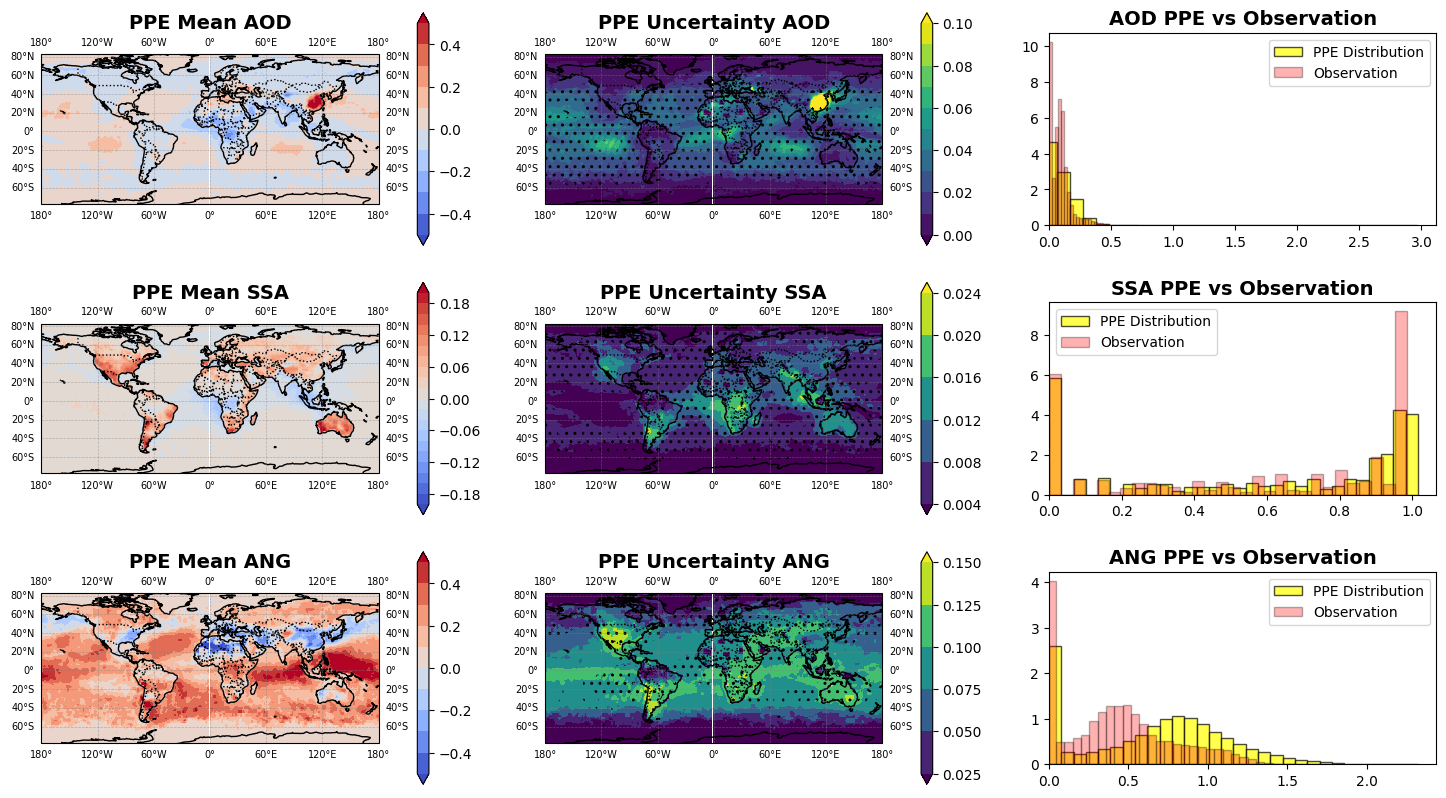

In [214]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Create figure
fig = plt.figure(figsize=(18, 12))

# Define grid for 3 rows, 3 columns with adjusted width ratios
grid = plt.GridSpec(3, 3, wspace=0.3, hspace=-0.3)

# Map Subplots
map_axes = [
    fig.add_subplot(grid[i, j], projection=ccrs.PlateCarree()) 
    for i in range(3) for j in range(2)
]

# Histogram Subplots (Regular 2D axes)
hist_axes = [
    fig.add_subplot(grid[i, 2]) for i in range(3)
]

# Modify the height of histogram axes directly (reduce their height equally from both ends)
for ax in hist_axes:
    pos = ax.get_position()  # Get current position
    new_height = pos.height * 0.5  # Shrink height by 20%
    new_bottom = pos.y0 + (pos.height - new_height) / 2  # Re-center the histogram
    
    ax.set_position([pos.x0, new_bottom, pos.width, new_height])  # Set new position

# Contour Levels
clevs_diff_aod = np.arange(-0.5, 0.5 + 0.1, 0.1)
clevs_std = np.arange(0, 0.1 + 0.01, 0.01)
clevs_diff_ssa = np.arange(-0.2, 0.2 + 0.02, 0.02)
clevs_diff_ang = np.arange(-0.5, 0.5 + 0.1, 0.1)

# Compute Differences
diff_aod = gp_prediction_aod.mean('sample') - AOD_PPE[-1].mean('month')
diff_ssa = gp_prediction_ssa.mean('sample') - SSA_PPE[-1].mean('month')
diff_ang = gp_prediction_ang.mean('sample') - ANG_PPE[-1].mean('month')

# Define colormap
cmap_diff = 'coolwarm'  # Diverging colormap for differences
cmap_std = 'viridis'  # Per your request

# Function to plot with colorbar (resized to fit subplot size)
def plot_with_colorbar(ax, data, lon, lat, cmap, clevs, title):
    img = plot_map(ax, data, lon, lat, cmap, clevs)  # Assuming plot_map returns an image
    cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)  # Increased pad
    cbar.ax.tick_params(labelsize=10)
    ax.set_title(title, fontsize=14, fontweight='bold')

# Plot Maps with Colorbars
plot_with_colorbar(map_axes[0], diff_aod, AOD_PPE.lon, AOD_PPE.lat, 'coolwarm', clevs_diff_aod, 'PPE Mean AOD')
plot_with_colorbar(map_axes[1], gp_prediction_aod.std('sample'), AOD_PPE.lon, AOD_PPE.lat, 'viridis', clevs_std, 'PPE Uncertainty AOD')

plot_with_colorbar(map_axes[2], diff_ssa, SSA_PPE.lon, SSA_PPE.lat, 'coolwarm', clevs_diff_ssa, 'PPE Mean SSA')
plot_with_colorbar(map_axes[3], gp_prediction_ssa.std('sample'), SSA_PPE.lon, SSA_PPE.lat, 'viridis', None, 'PPE Uncertainty SSA')

plot_with_colorbar(map_axes[4], diff_ang, ANG_PPE.lon, ANG_PPE.lat, 'coolwarm', clevs_diff_ang, 'PPE Mean ANG')
plot_with_colorbar(map_axes[5], gp_prediction_ang.std('sample'), ANG_PPE.lon, ANG_PPE.lat, 'viridis', None, 'PPE Uncertainty ANG')

# Statistical Significance Overlay
for i, (dots, dataset) in enumerate([(dots_aod, AOD_PPE), 
                                      (dots_ssa, SSA_PPE), 
                                      (dots_ang, ANG_PPE)]):
    # Getting indices of significant dots
    m, n = np.where(dots == 1)
    
    # Creating a mask for significant regions
    mask = np.zeros(dots.shape)
    mask[m, n] = 1  # Highlight statistically significant regions (1 for significance)
    
    # Accessing correct subplot axes (from map_axes)
    ax_i = map_axes[i * 2 + 1]  # Corresponds to the right column maps

    # Overlay contour for significance, using 'hatches' for highlighting
    ax_i.contourf(dataset.lon, dataset.lat, mask, 1, hatches=['', '..'], alpha=0)

# Histogram Plots (Now wider and shorter)
def plot_histogram(ax, data1, data2, title):
    ax.hist(data1, bins=30, color='yellow', edgecolor='black', alpha=0.7, label='PPE Distribution', density=True)
    ax.hist(data2, bins=30, color='red', edgecolor='black', alpha=0.3, label='Observation', density=True)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend()
    ax.set_xlim(left=0)  # Ensure the x-axis starts at zero for better visualization

# Histograms aligned properly
plot_histogram(hist_axes[0], flat_PPE_AOD, obs_spatial_AOD, 'AOD PPE vs Observation')
plot_histogram(hist_axes[1], flat_PPE_SSA, obs_spatial_SSA, 'SSA PPE vs Observation')
plot_histogram(hist_axes[2], flat_PPE_ANG, obs_spatial_ANG, 'ANG PPE vs Observation')

# Adjust layout
plt.tight_layout()
plt.show()
# plt.savefig("AOD_SSA_ANG_Comparison.png", dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'PPE uncertainty SSA')

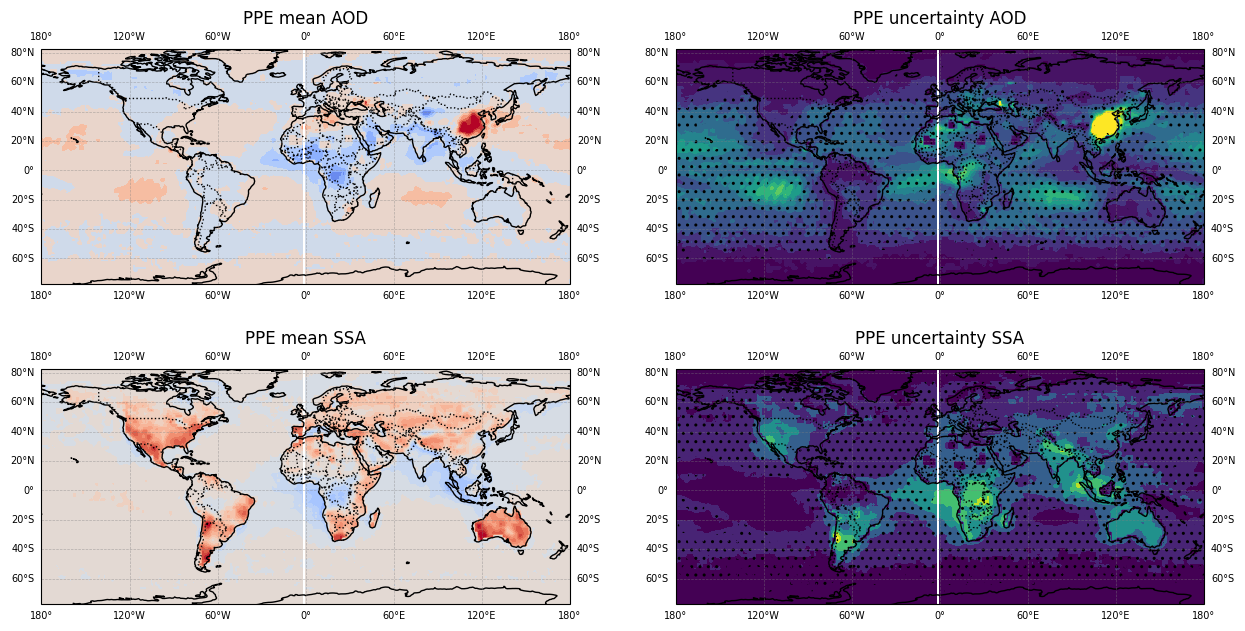

In [193]:
# fig, ax = plt.subplots(2, 2, figsize=(15, 13), subplot_kw={'projection': ccrs.PlateCarree()})
# plt.subplots_adjust(hspace=-0.53)#x=np.arange(40,70,5)
# clevs=np.arange(0,0.5+0.05,0.05)
# clevs_std=np.arange(0,0.1+0.01,0.01)
# xa,ya  = np.meshgrid(AOD_PPE.lon,AOD_PPE.lat)
# clevs_ssa=np.arange(0,1+0.05,0.05)
# clevs_diff_aod=np.arange(-0.5,0.5+0.1,0.1)

# clevs_diff_ssa=np.arange(-0.2,0.2+0.02,0.02)
# diff_aod = (gp_prediction_aod.mean('sample')-AOD_PPE[-1].mean('month'))
# diff_SSA = (gp_prediction_ssa.mean('sample')-SSA_PPE[-1].mean('month'))

# # plot_map(ax[0],gp_prediction.mean('sample'),AOD_PPE.lon,AOD_PPE.lat,'viridis',clevs)
# # plot_map(ax[1],AOD_PPE[-1].mean('month'),AOD_PPE.lon,AOD_PPE.lat,'viridis',clevs)
# plot_map(ax[0][0],diff_aod,AOD_PPE.lon,AOD_PPE.lat,'coolwarm',clevs_diff_aod)
# plot_map(ax[0][1],gp_prediction_aod.std('sample'),AOD_PPE.lon,AOD_PPE.lat,'viridis',clevs_std)
# plot_map(ax[1][0],diff_SSA,AOD_PPE.lon,AOD_PPE.lat,'coolwarm',clevs_diff_ssa)
# plot_map(ax[1][1],gp_prediction_ssa.std('sample'),AOD_PPE.lon,AOD_PPE.lat,'viridis',None)

# # plot_map(ax[1][1],ML.std('sample'),lons,lats,'viridis',clevs_std)

# #map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
# #                    resolution ='c',ax=ax[1][0])
# #x, y = map_ax1(xa,ya) 
# #1 indicates it is not statistically significant; 0 indicates it is
# [m,n] = np.where(dots_aod==1)
# z1 = np.zeros(dots_aod.shape)
# z1[m,n]=99
# ax[0][1].contourf(AOD_PPE.lon, AOD_PPE.lat, z1, 1, hatches=['', '..'], alpha=0)

# [m,n] = np.where(dots_ssa==1)
# z1 = np.zeros(dots_ssa.shape)
# z1[m,n]=99
# ax[1][1].contourf(SSA_PPE.lon, SSA_PPE.lat, z1, 1, hatches=['', '..'], alpha=0)

# # [m,n] = np.where(dots_ang==1)
# # z1 = np.zeros(dots_ang.shape)
# # z1[m,n]=99
# # ax[0][1].contourf(AOD_PPE.lon, AOD_PPE.lat, z1, 1, hatches=['', '..'], alpha=0)

# ax[0][0].set_title('PPE mean AOD')
# ax[0][1].set_title('PPE uncertainty AOD')
# ax[1][0].set_title('PPE mean SSA')
# ax[1][1].set_title('PPE uncertainty SSA')

# #plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/AMS/AOD_MODIS_Comparison.png",dpi=300,bbox_inches = 'tight')


Mean AOD: 0.11970118907726728
Standard Deviation: 0.019499577780869564


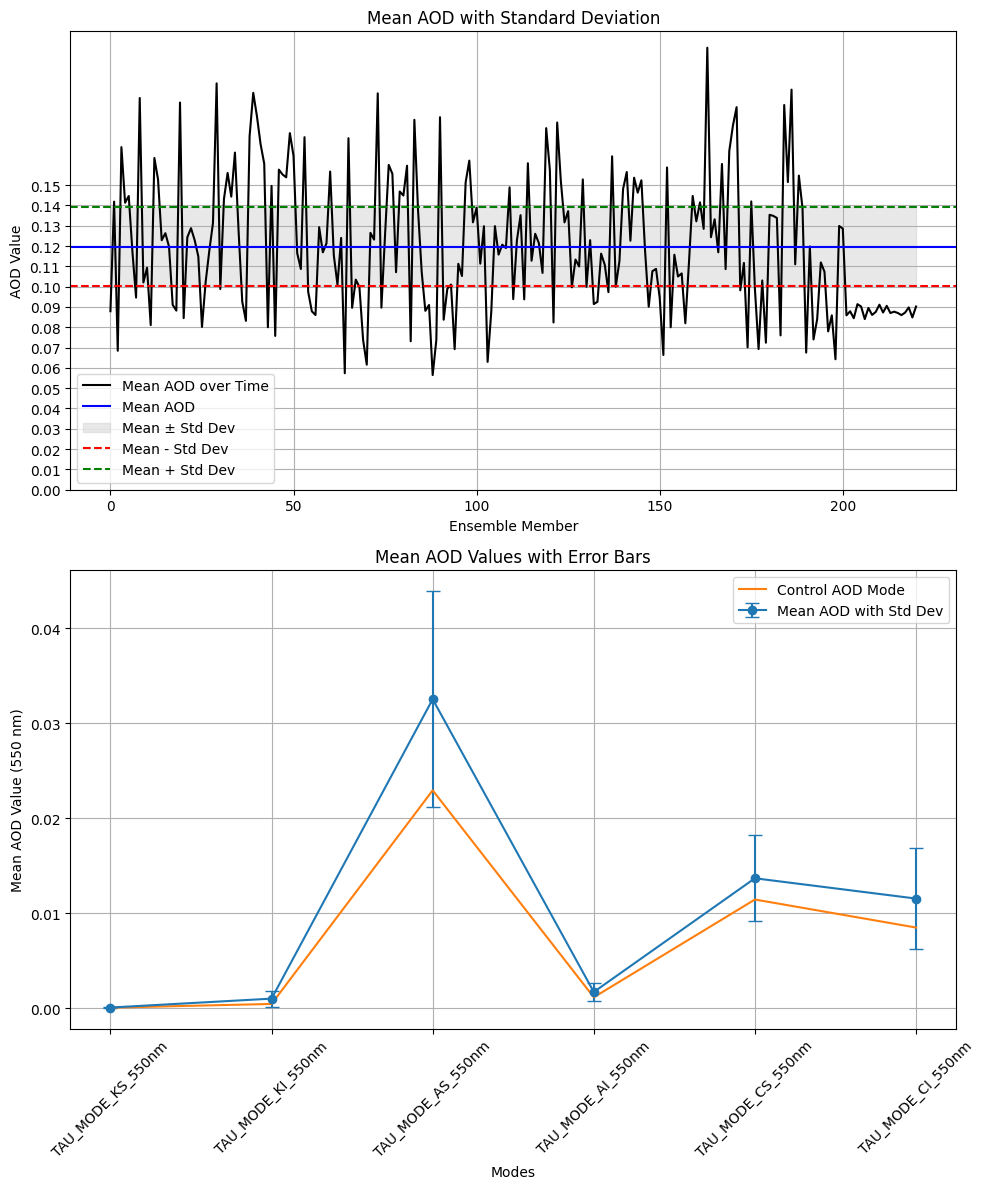

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(hspace=-0.53)#x=np.arange(40,70,5)
clevs=np.arange(0,0.5+0.05,0.05)
clevs_std=np.arange(0,0.1+0.01,0.01)
xa,ya  = np.meshgrid(lons,lats)

clevs_diff=np.arange(-0.5,0.5+0.1,0.1)
diff = (ML.mean('sample').data-aod_modis.data)
plot_map(ax[0][0],ML.mean('sample'),lons,lats,'viridis',clevs)
plot_map(ax[0][1],aod_modis,lons,lats,'viridis',clevs)
plot_map(ax[1][0],diff,lons,lats,'coolwarm',clevs_diff)
plot_map(ax[1][1],ML.std('sample'),lons,lats,'viridis',clevs_std)

plot_map(ax[1][1],ML.std('sample'),lons,lats,'viridis',clevs_std)

#map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
#                    resolution ='c',ax=ax[1][0])
#x, y = map_ax1(xa,ya) 
#1 indicates it is not statistically significant; 0 indicates it is
[m,n] = np.where(dots==1)
z1 = np.zeros(dots.shape)
z1[m,n]=99
ax[1][1].contourf(lons, lats, z1, 1, hatches=['', '..'], alpha=0)

ax[0][0].set_title('PPE mean AOD')
ax[0][1].set_title('MODIS 2010 mean')
ax[1][0].set_title('PPE minis MODIS')
ax[1][1].set_title('PPE AOD Uncertainty')

plt.savefig("/home/ybhatti/prjs1076/Plots/Conference_Plots/AMS/AOD_MODIS_Comparison.png",dpi=300,bbox_inches = 'tight')


In [11]:
regions=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/reg_18.nc').reg
regions_nn=xr.open_dataset('/home/ybhatti/prjs1076/Processed_Data/reg_18_regridded_nn.nc').reg

In [12]:
for i in range(1,19):
    reg1s = np.where(regions_nn==i,regions_nn,np.nan)
    reg1 = regions_nn.where(regions_nn == i, drop=True)
    laty = reg1.where(regions_nn == i, drop=True).lat


def Interpolate_Regional_uncertainty(Predicted,mask_number,Regions_nc):
    mask = Regions_nc == mask_number

    regional_array = Regions_nc.where(mask == True,drop=True)
    # Interpolate Predicted_Control to match the lat/lon grid of reg2
    Predicted_Control_interpolated = Predicted.interp(lat=regional_array.lat, lon=regional_array.lon, method="nearest")
    # Create a mask for values in reg2 equal to 5
    masks = regional_array == mask_number
    # Initialize a new array filled with NaNs, same shape as reg2
    new_array = xr.full_like(regional_array, np.nan, dtype=float)
    # Replace the '5' values in regional array with corresponding values from Predicted_Control_interpolated
    new_array = new_array.where(~masks, Predicted_Control_interpolated)
    return new_array

Region_Criteria = ["NA",
    "Arctic_Ocean", "Arctic_Land", "North_Pacific_Ocean", "North_America", 
    "North_Atlantic_Ocean", "Europe", "Asia", "Tropical_Pacific_Ocean", 
    "Tropical_Atlantic_Ocean", "Africa", "Tropical_Indian_Ocean", 
    "South_Pacific_Ocean", "South_America", "South_Atlantic_Ocean", 
    "South_Indian_Ocean", "Australia", "Antarctic_Ocean", "Antarctica"
]


Fig_2_file='/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/'

variables = ['ERF_ACI', 'AOD', 'ERF_ARI', 'SSA', 'Cloud_Cover', 'ERF']
types = ['uncertainty', 'areaweighted', 'mean']

# Use dictionary comprehension for clarity and efficiency
Fig_2 = {
    f"{var}_{typ}": xr.open_dataset(f"{Fig_2_file}{var}_{typ}_3_million.nc")
    for var in variables for typ in types
}
dimension = ['emulator','TAU_2D_550nm','emulator','emulator','emulator','emulator',]

ERF_Uncertainty = copy.deepcopy(Fig_2['ERF_uncertainty']['Emulated emulator'])

In [ ]:
n = 1000

# norm_para,para = pdf_parameters(n,ppe_paramater)
# norm_param = parameter_testing(norm_para,'')


norm_para,para = pdf_parameters(n,ppe_paramater)
PPE_Prediction, _ = gp_model_.predict(norm_para.values)

# Initialize an empty list to hold the results
results = []
#ERF_mean = areaweight(Predicted_Control[0],lats).mean()
for r in range(1,18): 
    print(f"{Region_Criteria[r]}")
    ERF_Uncertainty_regional = Interpolate_Regional_uncertainty(PPE_Prediction,r,regions_nn)
    ERF_Uncertainty_regional = ERF_Uncertainty_regional.transpose("sample", "lat", "lon")

    PPE_std_regional = areaweight(ERF_Uncertainty_regional,ERF_Uncertainty_regional.lat)
    #ERF_Uncertainty.interp(lat=regional_array.lat, lon=regional_array.lon, method="nearest")

    for col,i in zip(para.columns,range(0,len(para.columns))):
        #norm_para,para = pdf_parameters(n,ppe_paramater)
        norm_param = parameter_testing(norm_para,col)
        gp_prediction, _ = gp_model_.predict(norm_param.values)
        region  = Interpolate_Regional_uncertainty(gp_prediction,r,regions_nn)
        region = region.transpose("sample", "lat", "lon")

        gpmeans = areaweight(region,region.lat)
        print(col)
        gp_uncert = gpmeans.std()#**2
        gp_mean = gpmeans.mean()
                
        # Append the results as a dictionary
        results.append({
            'Region': Region_Criteria[r],
            'Variable': col,
            'std': gp_uncert.data,
            '5%': np.percentile(gp_mean,5).data,
         #   '%Variance %': ((np.percentile(gpmeans,95) - np.percentile(gpmeans,5)) / (np.percentile(PPE_std_regional,95) - np.percentile(PPE_std_regional,5)) *100),
            # '%range': (np.percentile(gpmeans,95) - np.percentile(gpmeans,5))*100,
            #'Variance %': (gp_uncert.data / PPE_std_regional.data)*100,
            '95%': np.percentile(gp_mean,95).data,
            'mean': gp_mean.data,
    
    #        'CNN_std': nnmeans,
    #        'Diff': difference
        })
    #results_df.to_csv(f"/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Raw/Table_of_Regional_Uncertainty_{Region_Criteria[r]}.csv", index=False)
    print('-------------')
   # end


# Convert the accumulated results into a DataFrame after the loop
results_df = pd.DataFrame(results)

# Calculate Variance % for each region
for r in range(1, 19):
    region_rows = results_df['Region'] == Region_Criteria[r]
    co = (results_df.loc[region_rows, 'std'] / results_df.loc[region_rows, 'std'].sum() * 100)

 #   co = results_df.loc[region_rows, 'std'] ** 2
    # Calculate total variance
 #   total_variance = co.sum()
    
    # Calculate contribution as a percentage
    
    results_df.loc[region_rows, 'Variance %'] = co

# # Convert the accumulated results into a DataFrame after the loop
# results_df = pd.DataFrame(results)

# # Calculate Variance % for each region
# for r in range(1, 19):
#     region_rows = results_df['Region'] == Region_Criteria[r]
#     co = (results_df.loc[region_rows, 'std'] / results_df.loc[region_rows, 'std'].sum() * 100)
#     results_df.loc[region_rows, 'Variance %'] = co


# Optional: Save or inspect the dataframe
#print(results_df)
#results_df.to_csv(f"/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Raw/Table_of_Regional_Uncertainty_{Region_Criteria[r]}.csv", index=False)


In [24]:
results_df = pd.DataFrame(results)

# Calculate Variance % for each region
for r in range(1, 18):
    region_rows = results_df['Region'] == Region_Criteria[r]
    co = (results_df.loc[region_rows, 'std'] / results_df.loc[region_rows, 'std'].sum() * 100)
    results_df.loc[region_rows, 'Variance %'] = co


In [175]:
table_aod = pd.read_csv('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Table_of_Global_Uncertainty_200000_AOD_PD.csv')
table_ERF = pd.read_csv('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Table_of_Global_Uncertainty_200000_ERF.csv')
table_ERF_ACI = pd.read_csv('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Table_of_Global_Uncertainty_200000_ERF_ACI.csv')
table_ERF_ARI = pd.read_csv('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Table_of_Global_Uncertainty_200000_ERF_ARI.csv')


merged_table = pd.merge(table_ERF, table_aod, on=["Variable"], how="left")
# Merge the tables on Region and Variable
merged_table = pd.merge(merged_table, table_ERF_ACI, on=["Variable"], how="left")
merged_table = pd.merge(merged_table, table_ERF_ARI, on=["Variable"], how="left")

merged_table["Variable"] = merged_table["Variable"].str.replace("V_SCALE_", "", regex=False)

table = pd.read_csv('/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Table_of_Global_Uncertainty_200000.csv')
table_regional = pd.read_csv("/home/ybhatti/prjs1076/Processed_Data/Analysed_Data/Table_of_Regional_Uncertainty_Variance_Total.csv")

#table = table.rename(columns={"std_table_ERF_ARI": "std", "std_AOD": "std_x", "std_ERF_ACI": "std_y"})
# columns_to_keep = ['Region', 'Variable', 'std_ERF', 'Uncertainty_ERF', 'std_x', 'Uncertainty_AOD_PD', 'std_y', 'Uncertainty_ERF_ACI', 'std', 'Uncertainty_ERF_ARI']
# table = table[columns_to_keep]
table_regional = pd.concat([table_regional, table], ignore_index=True)


In [78]:
os.chdir("/home/ybhatti/prjs1076/Observational_Data/")
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")
CapeGrim=pd.read_csv('CapeGrim_All_DMS_data1989-96.csv',parse_dates=['Datetime'],skiprows=1,usecols=[0,2])
CapeGrim=CapeGrim[1::]
CapeGrim['month']=CapeGrim['Datetime'].dt.month # add a new column for each month 
CapeGrim['season']=CapeGrim['Datetime'].dt.month # add a new column to change into seasons

CapeGrim['DMS']=pd.to_numeric(CapeGrim['DMS']) 
CapeGrim_CLIM=CapeGrim.groupby('month').mean() # Create climatology of A-DMS
CapeGrim_std=CapeGrim.groupby('month').std() # Create std of A-DMS
Cape_DMS=CapeGrim_CLIM['DMS'].to_numpy()
Cape_DMS_std=CapeGrim_std['DMS'].to_numpy()
mon=[12,1,2,3,4,5,6,7,8,9,10,11]
seas=[0,0,0,1,1,1,2,2,2,3,3,3]
#label the season the month is in. (0 = DJF; 1 = MAM; 2 = JJA; 3 = SON)
for m,se in zip(mon,seas):
    CapeGrim['season'].replace(to_replace=m,value=se,inplace=True) 

# ######################################################################### Station
# ######################### AMSTERDAM ISLAND ##############################  37°50′S 77°33′E
# ######################################################################### A-DMS
# netcdf is easier to clean
os.chdir("/home/ybhatti/prjs1076/Observational_Data/")
AMSTERDAM=xr.open_dataset('AmsterdamIsland/DMS_atmos_AmsterdamIsland_daily.nc')
AMSTERDAM_DMS=AMSTERDAM.surface_dimethyl_sulfide_concentrations
AMSTERDAM_lat=AMSTERDAM.latitude
AMSTERDAM_std=AMSTERDAM_DMS.groupby('time.month').std("time")[:,0]

AMSTERDAM_CLIM_DMS=AMSTERDAM_DMS.groupby('time.month').mean("time")[:,0]
Ams_Mons=[]
for i in range(1,13):
    mon = AMSTERDAM_DMS.where((AMSTERDAM_DMS['time.month'] == i), drop=True)
    Ams_Mons.append(mon.data) # for my violin plot - all the data in each month is flattened and appended/stored


os.chdir('/home/ybhatti/prjs1076/Emulator')


/scratch-local/ybhatti.9101573/ipykernel_186808/67991745.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  CapeGrim=pd.read_csv('CapeGrim_All_DMS_data1989-96.csv',parse_dates=['Datetime'],skiprows=1,usecols=[0,2])
/scratch-local/ybhatti.9101573/ipykernel_186808/67991745.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CapeGrim['season'].replace(to_replace=m,value=se,inplace=True)


In [208]:
ppe_var=copy.deepcopy(DMS_PD[:,:, 68, 41])
#ppe_var = ppe_var.isel(ensemble=~ppe_var.ensemble.isin([ 29,  57, 128]))
#ppe_var = ppe_var.isel(ensemble=~ppe_var.ensemble.isin([5,  17,  19,  69,  84, 113, 134,60, 161, 185]))

# n_test=60
# X_test, X_train = ppe_para[:n_test], ppe_para[n_test:]
# Y_test, Y_train = ppe_rf[:n_test], ppe_rf[n_test:]

n_total = len(ppe_para)
n_test = 60  # Number of test samples

# Generate randomized indices for splitting the data
random_indices = np.random.permutation(n_total)

# Split the randomized indices into test and train sets
test_indices = random_indices[:n_test]
train_indices = random_indices[n_test:]

X_test, X_train = ppe_para.iloc[test_indices], ppe_para.iloc[train_indices]
Y_test, Y_train = ppe_var.isel(ensemble=test_indices), ppe_var.isel(ensemble=train_indices)
gp_model_ = gp_model(X_train, Y_train, kernel=kernal)
gp_model_.train()

#AMSTERDAM ISLAND

n = 300000

results = []
norm_para,para = pdf_parameters(n,ppe_paramater)
norm_param = parameter_testing(norm_para,'V_SCALE_EMI_DMS')
gp_prediction, _ = gp_model_.predict(norm_param.values)

#gpmeans = areaweight(region,region.lat)
DMS_AMS_uncert = gp_prediction.std('sample')#**2
DMS_AMS_mean = gp_prediction.mean('sample')
            

ppe_var=copy.deepcopy(DMS_PD[:,:, 69, 77])
#ppe_var = ppe_var.isel(ensemble=~ppe_var.ensemble.isin([ 29,  57, 128]))
#ppe_var = ppe_var.isel(ensemble=~ppe_var.ensemble.isin([5,  17,  19,  69,  84, 113, 134,60, 161, 185]))

# n_test=60
# X_test, X_train = ppe_para[:n_test], ppe_para[n_test:]
# Y_test, Y_train = ppe_rf[:n_test], ppe_rf[n_test:]

n_total = len(ppe_para)
n_test = 60  # Number of test samples

# Generate randomized indices for splitting the data
random_indices = np.random.permutation(n_total)

# Split the randomized indices into test and train sets
test_indices = random_indices[:n_test]
train_indices = random_indices[n_test:]

X_test, X_train = ppe_para.iloc[test_indices], ppe_para.iloc[train_indices]
Y_test, Y_train = ppe_var.isel(ensemble=test_indices), ppe_var.isel(ensemble=train_indices)
gp_model_ = gp_model(X_train, Y_train, kernel=kernal)
gp_model_.train()

#AMSTERDAM ISLAND

n = 300000

results = []
norm_para,para = pdf_parameters(n,ppe_paramater)
norm_param = parameter_testing(norm_para,'V_SCALE_EMI_DMS')
gp_predictions, _ = gp_model_.predict(norm_param.values)

#gpmeans = areaweight(region,region.lat)
DMS_CAPE_uncert = gp_predictions.std('sample')#**2
DMS_CAPE_mean = gp_predictions.mean('sample')
            





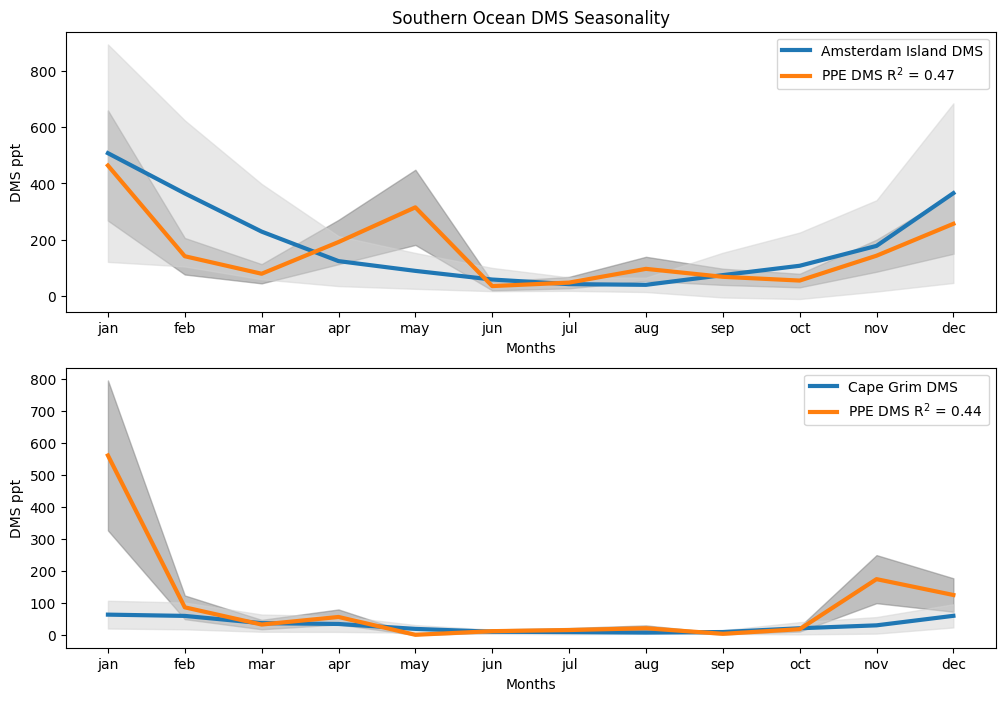

In [205]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
r2 = np.corrcoef(DMS_AMS_mean,AMSTERDAM_CLIM_DMS)[0][1]**2
# Plotting the Amsterdam CLIM DMS and GP Mean
ax[0].plot(AMSTERDAM_CLIM_DMS, label="Amsterdam Island DMS",lw=3)
ax[0].plot(DMS_AMS_mean[:], label=f"PPE DMS R$^2$ = {r2:.2f}",lw=3)
# Shading the uncertainty range around GP Mean
ax[0].fill_between(
    range(gp_mean.shape[0]),  # Assuming time is on x-axis
    DMS_AMS_mean[:] - DMS_AMS_uncert,  # Lower bound of uncertainty
    DMS_AMS_mean[:] + DMS_AMS_uncert,  # Upper bound of uncertainty
    color="gray",
    alpha=0.5)
ax[0].fill_between(
    range(gp_mean.shape[0]),  # Assuming time is on x-axis
    AMSTERDAM_CLIM_DMS[:] - AMSTERDAM_std,  # Lower bound of uncertainty
    AMSTERDAM_CLIM_DMS[:] + AMSTERDAM_std,  # Upper bound of uncertainty
    color="lightgray",
    alpha=0.5)

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']


# Plotting the Cape grim DMS and GP Mean

r2 = np.corrcoef(DMS_CAPE_mean,Cape_DMS)[0][1]**2
ax[1].plot(Cape_DMS, label="Cape Grim DMS",lw=3)
ax[1].plot(DMS_CAPE_mean[:], label=f"PPE DMS R$^2$ = {r2:.2f}",lw=3)

# Shading the uncertainty range around GP Mean
ax[1].fill_between(
    range(gp_mean.shape[0]),  # Assuming time is on x-axis
    DMS_CAPE_mean[:] - DMS_CAPE_uncert,  # Lower bound of uncertainty
    DMS_CAPE_mean[:] + DMS_CAPE_uncert,  # Upper bound of uncertainty
    color="gray",
    alpha=0.5)
ax[1].fill_between(
    range(gp_mean.shape[0]),  # Assuming time is on x-axis
    Cape_DMS[:] - Cape_DMS_std,  # Lower bound of uncertainty
    Cape_DMS[:] + Cape_DMS_std,  # Upper bound of uncertainty
    color="lightgray",
    alpha=0.5)

ax[0].set_title("Southern Ocean DMS Seasonality")

for i in range(0,2):
    # Adding labels and legend
    ax[i].set_xlabel("Months")
    ax[i].set_ylabel("DMS ppt")
    
    ax[i].legend()
    ax[i].set_xticks(np.arange(0,12,1)) # ERF STD # Manually set tick positions
    ax[i].set_xticklabels(months) # ERF STD # Manually set tick positions

plt.show()


## Compare PPE with 